In [ ]:
#Dynamic resource allocation is a technique used to efficiently allocate resources to tasks or processes in a system at runtime. This can be done in various programming languages. Here's a simple example of dynamic resource allocation using Python.
#In this example, we will allocate resources to tasks in a queue, assuming that tasks have different resource requirements and priorities. We will be using a priority queue to store tasks and allocate resources based on their priority.
import heapq

class Task:
    def __init__(self, id, priority, resource_req):
        self.id = id
        self.priority = priority
        self.resource_req = resource_req

    def __lt__(self, other):
        return self.priority < other.priority

    def __str__(self):
        return f"Task ID: {self.id}, Priority: {self.priority}, Resource Requirement: {self.resource_req}"

def allocate_resources(task_queue, available_resources):
    allocated_tasks = []

    while available_resources > 0 and task_queue:
        current_task = heapq.heappop(task_queue)

        if current_task.resource_req <= available_resources:
            print(f"Allocating resources to {current_task}")
            allocated_tasks.append(current_task)
            available_resources -= current_task.resource_req
        else:
            print(f"Insufficient resources for {current_task}")

    return allocated_tasks

if __name__ == "__main__":
    task_queue = []
    heapq.heapify(task_queue)

    tasks = [
        Task(1, 1, 10),
        Task(2, 3, 15),
        Task(3, 2, 20),
        Task(4, 4, 5),
    ]

    for task in tasks:
        heapq.heappush(task_queue, task)

    available_resources = 30
    allocated_tasks = allocate_resources(task_queue, available_resources)
    print("\nAllocated tasks:")
    for task in allocated_tasks:
        print(task)

#In this example, we create a Task class with an id, priority, and resource_req. The allocate_resources function takes a priority queue of tasks and available resources as input and allocates resources to tasks based on their priority.
#We use the heapq module in Python to create a priority queue. The tasks are sorted based on their priority, and resources are allocated accordingly.
#Please note that this is a simple example and may not cover all use cases or scenarios related to dynamic resource allocation. You can extend or modify this example based on your specific requirements.

Allocating resources to Task ID: 1, Priority: 1, Resource Requirement: 10
Allocating resources to Task ID: 3, Priority: 2, Resource Requirement: 20

Allocated tasks:
Task ID: 1, Priority: 1, Resource Requirement: 10
Task ID: 3, Priority: 2, Resource Requirement: 20


In [ ]:
#Predictive resource allocation involves estimating future resource requirements and allocating resources accordingly to ensure optimal system performance. In this example, we will use Python and a simple linear regression model from the Scikit-learn library to predict resource requirements for tasks.
#Suppose we have historical data about tasks and their resource requirements, and we want to predict the resource requirement for future tasks.
import numpy as np
import heapq
from sklearn.linear_model import LinearRegression

class Task:
    def __init__(self, id, priority, feature, resource_req=None):
        self.id = id
        self.priority = priority
        self.feature = feature
        self.resource_req = resource_req

    def __lt__(self, other):
        return self.priority < other.priority

    def __str__(self):
        return f"Task ID: {self.id}, Priority: {self.priority}, Resource Requirement: {self.resource_req}"

def train_predictive_model(features, resource_reqs):
    features = np.array(features).reshape(-1, 1)
    resource_reqs = np.array(resource_reqs).reshape(-1, 1)

    model = LinearRegression()
    model.fit(features, resource_reqs)
    return model

def predict_resource_req(model, feature):
    feature = np.array([feature]).reshape(-1, 1)
    return model.predict(feature)[0][0]

def allocate_resources(task_queue, available_resources):
    allocated_tasks = []

    while available_resources > 0 and task_queue:
        current_task = heapq.heappop(task_queue)

        if current_task.resource_req <= available_resources:
            print(f"Allocating resources to {current_task}")
            allocated_tasks.append(current_task)
            available_resources -= current_task.resource_req
        else:
            print(f"Insufficient resources for {current_task}")

    return allocated_tasks

if __name__ == "__main__":
    task_queue = []
    heapq.heapify(task_queue)

    historical_data = [
        (1, 10),
        (2, 20),
        (3, 30),
        (4, 40),
    ]

    features, resource_reqs = zip(*historical_data)
    predictive_model = train_predictive_model(features, resource_reqs)

    tasks = [
        Task(1, 1, 5),
        Task(2, 3, 6),
        Task(3, 2, 7),
        Task(4, 4, 8),
    ]

    for task in tasks:
        task.resource_req = predict_resource_req(predictive_model, task.feature)
        heapq.heappush(task_queue, task)

    available_resources = 60
    allocated_tasks = allocate_resources(task_queue, available_resources)
    print("\nAllocated tasks:")
    for task in allocated_tasks:
        print(task)
#In this example, we use historical data to train a linear regression model to predict resource requirements for tasks based on a given feature. The train_predictive_model function trains the linear regression model with historical data. The predict_resource_req function takes the trained model and a feature as input to predict the resource requirement for a task.
#The Task class has been updated to include a feature attribute, which represents a characteristic of the task that influences its resource requirements. The resource requirements are predicted using the trained model before the tasks are added to the priority queue.
#Finally, resources are allocated to tasks in the priority queue based on their priority and predicted resource requirements.
#Please note that this is a simple example and may not cover all use cases or scenarios related to predictive resource allocation. You can extend or modify this example based on your specific requirements and the type of predictive model you want to use.

Allocating resources to Task ID: 1, Priority: 1, Resource Requirement: 50.0
Insufficient resources for Task ID: 3, Priority: 2, Resource Requirement: 70.0
Insufficient resources for Task ID: 2, Priority: 3, Resource Requirement: 60.0
Insufficient resources for Task ID: 4, Priority: 4, Resource Requirement: 80.0

Allocated tasks:
Task ID: 1, Priority: 1, Resource Requirement: 50.0


In [ ]:
#Reactive resource allocation is a strategy where resources are allocated in response to the changing demands of a system at runtime. In this example, we will use Python to implement a reactive resource allocation system for a group of tasks. The system will monitor the resource demands of tasks and adjust resource allocation accordingly.
import heapq
import time

class Task:
    def __init__(self, id, priority, resource_req):
        self.id = id
        self.priority = priority
        self.resource_req = resource_req
        self.allocated_resources = 0

    def __lt__(self, other):
        return self.priority < other.priority

    def __str__(self):
        return f"Task ID: {self.id}, Priority: {self.priority}, Allocated Resources: {self.allocated_resources}/{self.resource_req}"

def monitor_resource_demand(tasks, update_interval=1):
    """Simulate dynamic changes in resource requirements."""
    for task in tasks:
        task.resource_req += update_interval * task.priority

def allocate_resources(task_queue, available_resources):
    allocated_tasks = []

    while available_resources > 0 and task_queue:
        current_task = heapq.heappop(task_queue)

        if current_task.resource_req <= available_resources:
            print(f"Allocating resources to {current_task}")
            current_task.allocated_resources = current_task.resource_req
            allocated_tasks.append(current_task)
            available_resources -= current_task.resource_req
        else:
            print(f"Insufficient resources for {current_task}")

    return allocated_tasks

if __name__ == "__main__":
    task_queue = []
    heapq.heapify(task_queue)

    tasks = [
        Task(1, 1, 10),
        Task(2, 3, 15),
        Task(3, 2, 20),
        Task(4, 4, 5),
    ]

    for task in tasks:
        heapq.heappush(task_queue, task)

    available_resources = 50

    # Reactively monitor resource demands and allocate resources accordingly
    while task_queue:
        print("Monitoring resource demands...")
        monitor_resource_demand(tasks)

        allocated_tasks = allocate_resources(task_queue, available_resources)
        print("\nAllocated tasks:")
        for task in allocated_tasks:
            print(task)
            available_resources -= task.allocated_resources
            #task_queue.remove(task)

        time.sleep(1)
#In this example, we create a Task class with an id, priority, and resource_req. The allocated_resources attribute is added to store the number of resources allocated to each task.
#The monitor_resource_demand function simulates dynamic changes in resource requirements for tasks. In this example, we increase the resource requirements for each task based on their priority and an update_interval. You can replace this function with your own monitoring mechanism.
#The allocate_resources function is called within the main loop, which allows the system to continuously react to changes in resource demands and allocate resources accordingly.
#Please note that this is a simple example and may not cover all use cases or scenarios related to reactive resource allocation. You can extend or modify this example based on your specific requirements.

Monitoring resource demands...
Allocating resources to Task ID: 1, Priority: 1, Allocated Resources: 0/11
Allocating resources to Task ID: 3, Priority: 2, Allocated Resources: 0/22
Insufficient resources for Task ID: 2, Priority: 3, Allocated Resources: 0/18
Allocating resources to Task ID: 4, Priority: 4, Allocated Resources: 0/9

Allocated tasks:
Task ID: 1, Priority: 1, Allocated Resources: 11/11
Task ID: 3, Priority: 2, Allocated Resources: 22/22
Task ID: 4, Priority: 4, Allocated Resources: 9/9


In [ ]:
#A hybrid approach combines the concepts of predictive and reactive resource allocation to make better use of available resources. In this example, we will use Python to implement a hybrid resource allocation system that combines the linear regression model from the predictive approach and the monitoring mechanism from the reactive approach.
import heapq
import time
import numpy as np
from sklearn.linear_model import LinearRegression

class Task:
    def __init__(self, id, priority, feature, resource_req=None):
        self.id = id
        self.priority = priority
        self.feature = feature
        self.resource_req = resource_req
        self.allocated_resources = 0

    def __lt__(self, other):
        return self.priority < other.priority

    def __str__(self):
        return f"Task ID: {self.id}, Priority: {self.priority}, Allocated Resources: {self.allocated_resources}/{self.resource_req}"

def train_predictive_model(features, resource_reqs):
    features = np.array(features).reshape(-1, 1)
    resource_reqs = np.array(resource_reqs).reshape(-1, 1)

    model = LinearRegression()
    model.fit(features, resource_reqs)
    return model

def predict_resource_req(model, feature):
    feature = np.array([feature]).reshape(-1, 1)
    return model.predict(feature)[0][0]

def monitor_resource_demand(tasks, update_interval=1):
    """Simulate dynamic changes in resource requirements."""
    for task in tasks:
        task.resource_req += update_interval * task.priority

def allocate_resources(task_queue, available_resources):
    allocated_tasks = []

    while available_resources > 0 and task_queue:
        current_task = heapq.heappop(task_queue)

        if current_task.resource_req <= available_resources:
            print(f"Allocating resources to {current_task}")
            current_task.allocated_resources = current_task.resource_req
            allocated_tasks.append(current_task)
            available_resources -= current_task.resource_req
        else:
            print(f"Insufficient resources for {current_task}")

    return allocated_tasks

if __name__ == "__main__":
    task_queue = []
    heapq.heapify(task_queue)

    historical_data = [
        (1, 10),
        (2, 20),
        (3, 30),
        (4, 40),
    ]

    features, resource_reqs = zip(*historical_data)
    predictive_model = train_predictive_model(features, resource_reqs)

    tasks = [
        Task(1, 1, 5),
        Task(2, 3, 6),
        Task(3, 2, 7),
        Task(4, 4, 8),
    ]

    for task in tasks:
        task.resource_req = predict_resource_req(predictive_model, task.feature)
        heapq.heappush(task_queue, task)

    available_resources = 200

    # Hybrid approach: combine predictive and reactive resource allocation
    while task_queue:
        print("Monitoring resource demands...")
        monitor_resource_demand(tasks)

        allocated_tasks = allocate_resources(task_queue, available_resources)
        print("\nAllocated tasks:")
        for task in allocated_tasks:
            print(task)
            available_resources -= task.allocated_resources
            #task_queue.remove(task)

        time.sleep(1)
#In this example, we first use the predictive approach to estimate the initial resource requirements of tasks based on historical data and a linear regression model. Then, we continuously monitor the resource demands of tasks to react to any changes in the system.
#The main loop combines both the predictive and reactive approaches, adjusting resource allocation according to the changing demands of the tasks.

Monitoring resource demands...
Allocating resources to Task ID: 1, Priority: 1, Allocated Resources: 0/51.0
Allocating resources to Task ID: 3, Priority: 2, Allocated Resources: 0/72.0
Allocating resources to Task ID: 2, Priority: 3, Allocated Resources: 0/63.0
Insufficient resources for Task ID: 4, Priority: 4, Allocated Resources: 0/84.0

Allocated tasks:
Task ID: 1, Priority: 1, Allocated Resources: 51.0/51.0
Task ID: 3, Priority: 2, Allocated Resources: 72.0/72.0
Task ID: 2, Priority: 3, Allocated Resources: 63.0/63.0


<ipython-input-11-78aa8f3ffb5e>:140: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = animation.FuncAnimation(fig, update_resource_plot, fargs=(resource_plot,), interval=1000)
2023-05-22 10:06:47,154 Allocating resources to Task ID: 4, Priority: 4, PF Score: 4.0, Allocated Resources: 0/84.0
2023-05-22 10:06:47,154 Allocating resources to Task ID: 4, Priority: 4, PF Score: 4.0, Allocated Resources: 0/84.0
2023-05-22 10:06:47,154 Allocating resources to Task ID: 4, Priority: 4, PF Score: 4.0, Allocated Resources: 0/84.0
/usr/local/lib/python3.10/dist-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variabl

Monitoring resource demands...


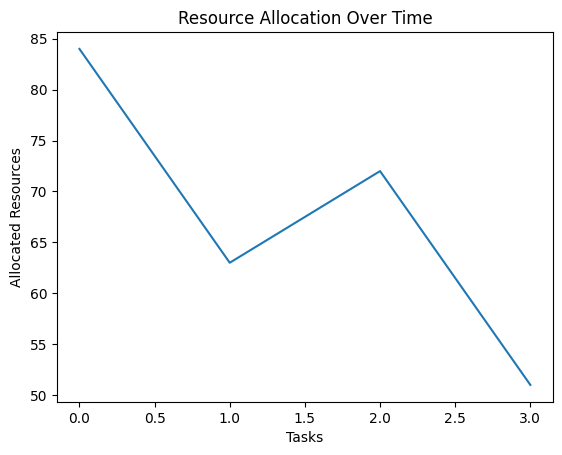


Allocated tasks:
Task ID: 4, Priority: 4, PF Score: 4.0, Allocated Resources: 84.0/84.0
Task ID: 2, Priority: 3, PF Score: 3.0, Allocated Resources: 63.0/63.0
Task ID: 3, Priority: 2, PF Score: 2.0, Allocated Resources: 72.0/72.0
Task ID: 1, Priority: 1, PF Score: 1.0, Allocated Resources: 51.0/51.0


In [ ]:
import heapq
import time
import numpy as np
import logging
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib.animation as animation

logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

# Create a file handler
file_handler = logging.FileHandler('resource_allocation.log')
file_handler.setLevel(logging.INFO)

# Create a console handler
console_handler = logging.StreamHandler()
console_handler.setLevel(logging.DEBUG)  # Set to DEBUG for more detailed console output during development

# Create a formatter and add it to the handlers
formatter = logging.Formatter('%(asctime)s %(message)s')
file_handler.setFormatter(formatter)
console_handler.setFormatter(formatter)

# Add the handlers to the logger
logger.addHandler(file_handler)
logger.addHandler(console_handler)


class Task:
    def __init__(self, id, priority, feature, resource_req=None):
        self.id = id
        self.priority = priority
        self.feature = feature
        self.resource_req = resource_req
        self.allocated_resources = 0
        self.pf_score = 0  # Proportional Fair score

    def __lt__(self, other):
        return self.pf_score < other.pf_score

    def __str__(self):
        return f"Task ID: {self.id}, Priority: {self.priority}, PF Score: {self.pf_score}, Allocated Resources: {self.allocated_resources}/{self.resource_req}"


def train_predictive_model(features, resource_reqs):
    features = np.array(features).reshape(-1, 1)
    resource_reqs = np.array(resource_reqs).reshape(-1, 1)

    model = LinearRegression()
    model.fit(features, resource_reqs)
    return model


def predict_resource_req(model, feature):
    feature = np.array([feature]).reshape(-1, 1)
    return model.predict(feature)[0][0]


def monitor_resource_demand(tasks, update_interval=1):
    """Simulate dynamic changes in resource requirements."""
    for task in tasks:
        task.resource_req += update_interval * task.priority


def allocate_resources_pf(task_queue, available_resources):
    allocated_tasks = []
    resource_plot = []

    while available_resources > 0 and task_queue:
        # Calculate PF score for each task
        for task in task_queue:
            task.pf_score = task.priority / (task.allocated_resources + 1)

        # Sort task queue based on PF score
        task_queue.sort(reverse=True)

        current_task = task_queue[0]

        if current_task.resource_req <= available_resources:
            logger.info(f"Allocating resources to {current_task}")
            current_task.allocated_resources = current_task.resource_req
            allocated_tasks.append(current_task)
            available_resources -= current_task.resource_req
            task_queue.remove(current_task)
            resource_plot.append(current_task.allocated_resources)
        else:
            logger.info(f"Insufficient resources for {current_task}")
            # Sort remaining tasks by priority in descending order
            task_queue.sort(key=lambda x: x.priority, reverse=True)
            break

    # Plot resource allocation
    plt.plot(resource_plot)
    plt.title('Resource Allocation Over Time')
    plt.xlabel('Tasks')
    plt.ylabel('Allocated Resources')
    plt.show()

    return allocated_tasks


if __name__ == "__main__":
    task_queue = []

    historical_data = [
        (1, 10),
        (2, 20),
        (3, 30),
        (4, 40),
    ]

    features, resource_reqs = zip(*historical_data)
    predictive_model = train_predictive_model(features, resource_reqs)

    tasks = [
        Task(1, 1, 5),
        Task(2, 3, 6),
        Task(3, 2, 7),
        Task(4, 4, 8),
    ]

    for task in tasks:
        task.resource_req = predict_resource_req(predictive_model, task.feature)
        task_queue.append(task)

    available_resources = 500

    # Add a function to update the resource plot animation
    def update_resource_plot(frame_num, resource_plot):
        plt.cla()
        plt.plot(resource_plot)
        plt.title('Resource Allocation Over Time')
        plt.xlabel('Tasks')
        plt.ylabel('Allocated Resources')

    # Modify the resource allocation loop
    fig = plt.figure()
    resource_plot = []
    ani = animation.FuncAnimation(fig, update_resource_plot, fargs=(resource_plot,), interval=1000)

    while task_queue:
        print("Monitoring resource demands...")
        monitor_resource_demand(tasks)

        allocated_tasks = allocate_resources_pf(task_queue, available_resources)
        print("\nAllocated tasks:")
        for task in allocated_tasks:
            print(task)
            available_resources -= task.allocated_resources
            resource_plot.append(task.allocated_resources)

        time.sleep(1)

    plt.show()


1. Add task
2. Remove task
3. Exit
Enter your choice: 1
Enter task ID: 1
Enter task priority: 2
Enter task feature: 3
Task added successfully.
Monitoring resource demands...


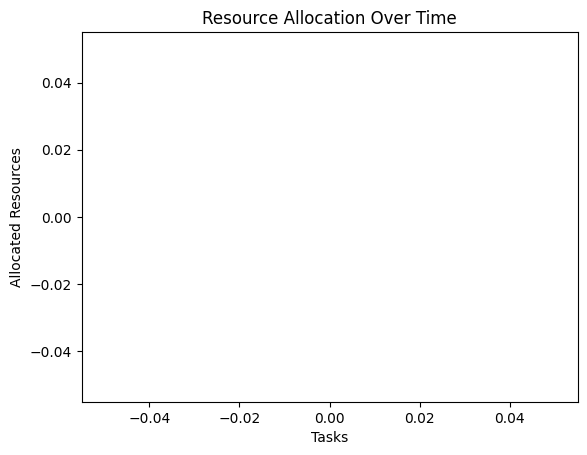


Allocated tasks:
1. Add task
2. Remove task
3. Exit
Enter your choice: 1
Enter task ID: 2
Enter task priority: 3
Enter task feature: 4
Task added successfully.
Monitoring resource demands...


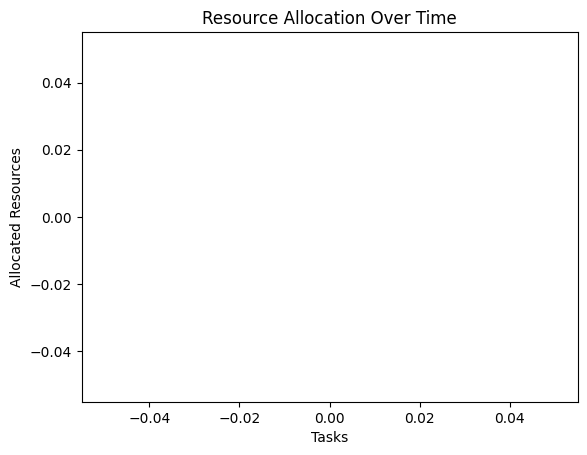


Allocated tasks:
1. Add task
2. Remove task
3. Exit
Enter your choice: 1
Enter task ID: 2
Enter task priority: 5
Enter task feature: 


2023-05-23 03:25:30,231 Resource allocation error: invalid literal for int() with base 10: ''
2023-05-23 03:25:30,231 Resource allocation error: invalid literal for int() with base 10: ''
2023-05-23 03:25:30,231 Resource allocation error: invalid literal for int() with base 10: ''
2023-05-23 03:25:30,231 Resource allocation error: invalid literal for int() with base 10: ''
ERROR:__main__:Resource allocation error: invalid literal for int() with base 10: ''


In [ ]:
#under devolpment
import heapq
import time
import numpy as np
import logging
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib.animation as animation
import psutil


logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

# Create a file handler
file_handler = logging.FileHandler('resource_allocation.log')
file_handler.setLevel(logging.INFO)

# Create a console handler
console_handler = logging.StreamHandler()
console_handler.setLevel(logging.DEBUG)  # Set to DEBUG for more detailed console output during development

# Create a formatter and add it to the handlers
formatter = logging.Formatter('%(asctime)s %(message)s')
file_handler.setFormatter(formatter)
console_handler.setFormatter(formatter)

# Add the handlers to the logger
logger.addHandler(file_handler)
logger.addHandler(console_handler)


class Task:
    def __init__(self, id, priority, feature, resource_req=None):
        self.id = id
        self.priority = priority
        self.feature = feature
        self.resource_req = resource_req
        self.allocated_resources = 0
        self.pf_score = 0  # Proportional Fair score

    def __lt__(self, other):
        return self.pf_score < other.pf_score

    def __str__(self):
        return f"Task ID: {self.id}, Priority: {self.priority}, PF Score: {self.pf_score}, Allocated Resources: {self.allocated_resources}/{self.resource_req}"


def train_predictive_model(features, resource_reqs):
    features = np.array(features).reshape(-1, 1)
    resource_reqs = np.array(resource_reqs).reshape(-1, 1)

    model = LinearRegression()
    model.fit(features, resource_reqs)
    return model


def predict_resource_req(model, feature):
    feature = np.array([feature]).reshape(-1, 1)
    return model.predict(feature)[0][0]


def monitor_resource_demand(tasks, update_interval=1):
    """Simulate dynamic changes in resource requirements."""
    for task in tasks:
        task.resource_req += update_interval * task.priority

def allocate_resources_pf(task_queue, available_resources):
    allocated_tasks = []
    resource_plot = []

    while available_resources > 0 and task_queue:
        # Calculate PF score for each task
        for task in task_queue:
            task.pf_score = task.priority / (task.allocated_resources + 1)

        # Sort task queue based on PF score
        task_queue.sort(reverse=True)

        current_task = task_queue[0]

        if current_task.resource_req <= available_resources:
            logger.info(f"Allocating resources to {current_task}")
            current_task.allocated_resources = current_task.resource_req
            allocated_tasks.append(current_task)
            available_resources -= current_task.resource_req
            task_queue.remove(current_task)
            resource_plot.append(current_task.allocated_resources)
        else:
            logger.info(f"Insufficient resources for {current_task}")
            # Sort remaining tasks by priority in descending order
            task_queue.sort(key=lambda x: x.priority, reverse=True)
            break

    # Plot resource allocation
    plt.plot(resource_plot)
    plt.title('Resource Allocation Over Time')
    plt.xlabel('Tasks')
    plt.ylabel('Allocated Resources')
    plt.show()

    return allocated_tasks, available_resources  # Return updated available_resources


def get_available_resources():
    # This is a simple and somewhat naive example. Real-world calculations could be much more complex.

    # Get total bandwidth (in Mbps)
    max_bandwidth = 1000  # This is a placeholder value

    # Calculate network usage using psutil
    net_io_counters = psutil.net_io_counters()
    current_network_usage = (net_io_counters.bytes_sent + net_io_counters.bytes_recv) * 8 / 1e6  # Convert to Mbps

    # Placeholder logic for latency and packet loss
    estimated_latency = 50  # In milliseconds
    estimated_packet_loss = 5  # Percentage

    # Adjust available bandwidth based on latency and packet loss
    # This is a simplistic approach. In reality, the relationship could be much more complex.
    available_bandwidth = max_bandwidth - current_network_usage
    available_bandwidth -= estimated_latency * 0.1  # Assume each millisecond of latency reduces bandwidth by 0.1 Mbps
    available_bandwidth -= available_bandwidth * (estimated_packet_loss / 100)  # Reduce bandwidth by the percentage of packet loss

    return available_bandwidth



def integrate_with_resource_monitoring():
    # Code to integrate with resource monitoring system
    # Retrieve real-time information about resource availability, usage, and performance
    # Update available_resources variable based on the monitored data

    # Example implementation:
    available_resources = get_available_resources()  # Replace with actual implementation

    return available_resources

def handle_resource_allocation_errors():
    # Code to handle resource allocation errors
    # Implement fault tolerance mechanisms, retries, fallback strategies, etc.
    # Handle exceptions and errors that may occur during resource allocation

    task_queue = []

    historical_data = [
        (1, 10),
        (2, 20),
        (3, 30),
        (4, 40),
    ]

    features, resource_reqs = zip(*historical_data)
    predictive_model = train_predictive_model(features, resource_reqs)

    tasks = [
        Task(1, 1, 5),
        Task(2, 3, 6),
        Task(3, 2, 7),
        Task(4, 4, 8),
    ]

    for task in tasks:
        task.resource_req = predict_resource_req(predictive_model, task.feature)
        task_queue.append(task)

    try:
        while True:
            print("1. Add task")
            print("2. Remove task")
            print("3. Exit")
            choice = input("Enter your choice: ")

            if choice == '1':
                task_id = int(input("Enter task ID: "))
                priority = int(input("Enter task priority: "))
                feature = int(input("Enter task feature: "))
                task = Task(task_id, priority, feature)
                task.resource_req = predict_resource_req(predictive_model, task.feature)
                task_queue.append(task)
                print("Task added successfully.")
            elif choice == '2':
                task_id = int(input("Enter task ID to remove: "))
                task_to_remove = next((task for task in task_queue if task.id == task_id), None)
                if task_to_remove:
                    task_queue.remove(task_to_remove)
                    print("Task removed successfully.")
                else:
                    print("Task not found.")
            elif choice == '3':
                break
            else:
                print("Invalid choice. Please try again.")

            available_resources = integrate_with_resource_monitoring()

            print("Monitoring resource demands...")
            monitor_resource_demand(tasks)

            allocated_tasks, available_resources = allocate_resources_pf(task_queue, available_resources)  # Update available_resources
            print("\nAllocated tasks:")
            for task in allocated_tasks:
                print(task)

            time.sleep(1)

    except Exception as e:
        logger.error(f"Resource allocation error: {str(e)}")
        # Implement error handling logic, retries, fallback strategies, etc.


if __name__ == "__main__":
    handle_resource_allocation_errors()


<ipython-input-5-27320391a5df>:140: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = animation.FuncAnimation(fig, update_resource_plot, fargs=(resource_plot,), interval=1000)


1. Add task
2. Remove task
3. Exit
Enter your choice: 1
Enter task ID: 1
Enter task priority: 2
Enter task feature: 3


2023-05-23 03:26:53,818 Allocating resources to Task ID: 4, Priority: 4, PF Score: 4.0, Allocated Resources: 0/84.0
2023-05-23 03:26:53,818 Allocating resources to Task ID: 4, Priority: 4, PF Score: 4.0, Allocated Resources: 0/84.0
2023-05-23 03:26:53,818 Allocating resources to Task ID: 4, Priority: 4, PF Score: 4.0, Allocated Resources: 0/84.0
2023-05-23 03:26:53,818 Allocating resources to Task ID: 4, Priority: 4, PF Score: 4.0, Allocated Resources: 0/84.0
2023-05-23 03:26:53,818 Allocating resources to Task ID: 4, Priority: 4, PF Score: 4.0, Allocated Resources: 0/84.0
INFO:__main__:Allocating resources to Task ID: 4, Priority: 4, PF Score: 4.0, Allocated Resources: 0/84.0
2023-05-23 03:26:53,848 Allocating resources to Task ID: 2, Priority: 3, PF Score: 3.0, Allocated Resources: 0/63.0
2023-05-23 03:26:53,848 Allocating resources to Task ID: 2, Priority: 3, PF Score: 3.0, Allocated Resources: 0/63.0
2023-05-23 03:26:53,848 Allocating resources to Task ID: 2, Priority: 3, PF Score:

Task added successfully.
Monitoring resource demands...


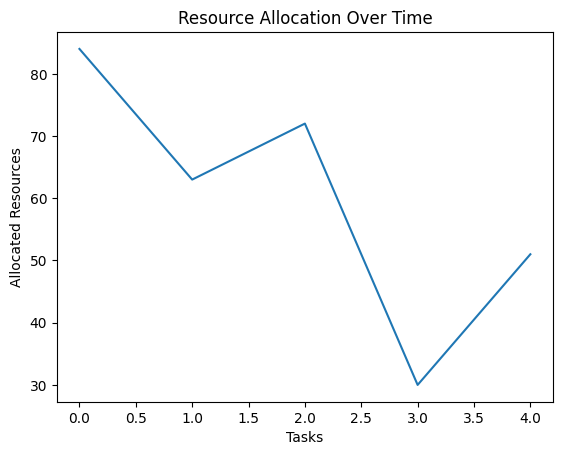


Allocated tasks:
Task ID: 4, Priority: 4, PF Score: 4.0, Allocated Resources: 84.0/84.0
Task ID: 2, Priority: 3, PF Score: 3.0, Allocated Resources: 63.0/63.0
Task ID: 3, Priority: 2, PF Score: 2.0, Allocated Resources: 72.0/72.0
Task ID: 1, Priority: 2, PF Score: 2.0, Allocated Resources: 30.0/30.0
Task ID: 1, Priority: 1, PF Score: 1.0, Allocated Resources: 51.0/51.0
1. Add task
2. Remove task
3. Exit
Enter your choice: 3


In [ ]:
import heapq
import time
import numpy as np
import logging
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib.animation as animation

logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

# Create a file handler
file_handler = logging.FileHandler('resource_allocation.log')
file_handler.setLevel(logging.INFO)

# Create a console handler
console_handler = logging.StreamHandler()
console_handler.setLevel(logging.DEBUG)  # Set to DEBUG for more detailed console output during development

# Create a formatter and add it to the handlers
formatter = logging.Formatter('%(asctime)s %(message)s')
file_handler.setFormatter(formatter)
console_handler.setFormatter(formatter)

# Add the handlers to the logger
logger.addHandler(file_handler)
logger.addHandler(console_handler)


class Task:
    def __init__(self, id, priority, feature, resource_req=None):
        self.id = id
        self.priority = priority
        self.feature = feature
        self.resource_req = resource_req
        self.allocated_resources = 0
        self.pf_score = 0  # Proportional Fair score

    def __lt__(self, other):
        return self.pf_score < other.pf_score

    def __str__(self):
        return f"Task ID: {self.id}, Priority: {self.priority}, PF Score: {self.pf_score}, Allocated Resources: {self.allocated_resources}/{self.resource_req}"


def train_predictive_model(features, resource_reqs):
    features = np.array(features).reshape(-1, 1)
    resource_reqs = np.array(resource_reqs).reshape(-1, 1)

    model = LinearRegression()
    model.fit(features, resource_reqs)
    return model


def predict_resource_req(model, feature):
    feature = np.array([feature]).reshape(-1, 1)
    return model.predict(feature)[0][0]


def monitor_resource_demand(tasks, update_interval=1):
    """Simulate dynamic changes in resource requirements."""
    for task in tasks:
        task.resource_req += update_interval * task.priority


def allocate_resources_pf(task_queue, available_resources):
    allocated_tasks = []
    resource_plot = []

    while available_resources > 0 and task_queue:
        # Calculate PF score for each task
        for task in task_queue:
            task.pf_score = task.priority / (task.allocated_resources + 1)

        # Sort task queue based on PF score
        task_queue.sort(reverse=True)

        current_task = task_queue[0]

        if current_task.resource_req <= available_resources:
            logger.info(f"Allocating resources to {current_task}")
            current_task.allocated_resources = current_task.resource_req
            allocated_tasks.append(current_task)
            available_resources -= current_task.resource_req
            task_queue.remove(current_task)
            resource_plot.append(current_task.allocated_resources)
        else:
            logger.info(f"Insufficient resources for {current_task}")
            # Sort remaining tasks by priority in descending order
            task_queue.sort(key=lambda x: x.priority, reverse=True)
            break

    # Plot resource allocation
    plt.plot(resource_plot)
    plt.title('Resource Allocation Over Time')
    plt.xlabel('Tasks')
    plt.ylabel('Allocated Resources')
    plt.show()

    return allocated_tasks


if __name__ == "__main__":
    task_queue = []

    historical_data = [
        (1, 10),
        (2, 20),
        (3, 30),
        (4, 40),
    ]

    features, resource_reqs = zip(*historical_data)
    predictive_model = train_predictive_model(features, resource_reqs)

    tasks = [
        Task(1, 1, 5),
        Task(2, 3, 6),
        Task(3, 2, 7),
        Task(4, 4, 8),
    ]

    for task in tasks:
        task.resource_req = predict_resource_req(predictive_model, task.feature)
        task_queue.append(task)

    available_resources = 500

    # Add a function to update the resource plot animation
    def update_resource_plot(frame_num, resource_plot):
        plt.cla()
        plt.plot(resource_plot)
        plt.title('Resource Allocation Over Time')
        plt.xlabel('Tasks')
        plt.ylabel('Allocated Resources')

    # Modify the resource allocation loop
    fig = plt.figure()
    resource_plot = []
    ani = animation.FuncAnimation(fig, update_resource_plot, fargs=(resource_plot,), interval=1000)

    while True:
        print("1. Add task")
        print("2. Remove task")
        print("3. Exit")
        choice = input("Enter your choice: ")

        if choice == '1':
            task_id = int(input("Enter task ID: "))
            priority = int(input("Enter task priority: "))
            feature = int(input("Enter task feature: "))
            task = Task(task_id, priority, feature)
            task.resource_req = predict_resource_req(predictive_model, task.feature)
            task_queue.append(task)
            print("Task added successfully.")
        elif choice == '2':
            task_id = int(input("Enter task ID to remove: "))
            task_to_remove = next((task for task in task_queue if task.id == task_id), None)
            if task_to_remove:
                task_queue.remove(task_to_remove)
                print("Task removed successfully.")
            else:
                print("Task not found.")
        elif choice == '3':
            break
        else:
            print("Invalid choice. Please try again.")

        print("Monitoring resource demands...")
        monitor_resource_demand(tasks)

        allocated_tasks = allocate_resources_pf(task_queue, available_resources)
        print("\nAllocated tasks:")
        for task in allocated_tasks:
            print(task)
            available_resources -= task.allocated_resources
            resource_plot.append(task.allocated_resources)

        time.sleep(1)

    plt.show()


1. Add task
2. Remove task
3. Exit
Enter your choice: 1
Enter task ID: 1
Enter task priority: 2
Enter task feature: 3
Task added successfully.
Monitoring resource demands...


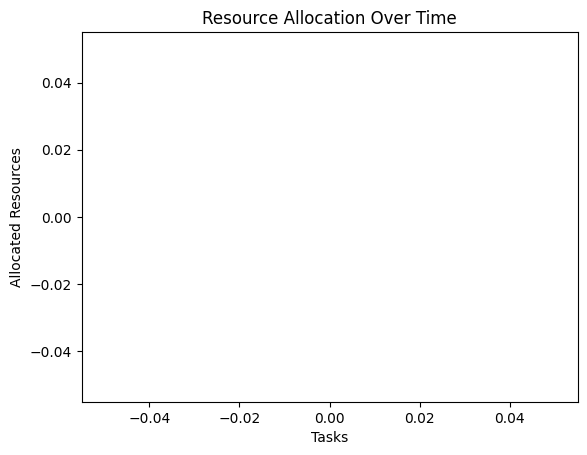


Allocated tasks:
1. Add task
2. Remove task
3. Exit
Enter your choice: 1
Enter task ID: 2
Enter task priority: 3
Enter task feature: 4
Task added successfully.
Monitoring resource demands...


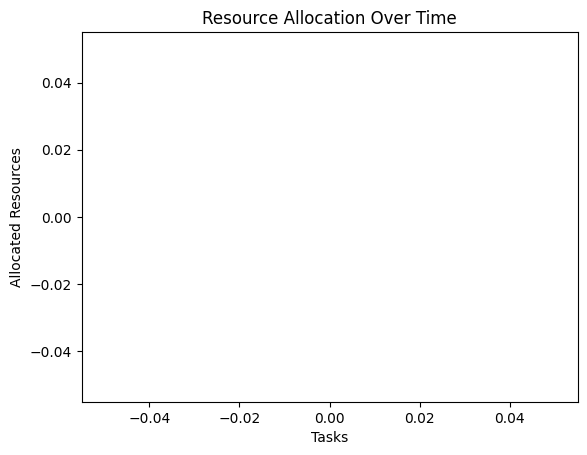


Allocated tasks:
1. Add task
2. Remove task
3. Exit
Enter your choice: 1
Enter task ID: 2
Enter task priority: 5
Enter task feature: 


2023-05-23 03:25:30,231 Resource allocation error: invalid literal for int() with base 10: ''
2023-05-23 03:25:30,231 Resource allocation error: invalid literal for int() with base 10: ''
2023-05-23 03:25:30,231 Resource allocation error: invalid literal for int() with base 10: ''
2023-05-23 03:25:30,231 Resource allocation error: invalid literal for int() with base 10: ''
ERROR:__main__:Resource allocation error: invalid literal for int() with base 10: ''


In [ ]:
#under devlopment
import heapq
import time
import numpy as np
import logging
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib.animation as animation
import psutil


logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

# Create a file handler
file_handler = logging.FileHandler('resource_allocation.log')
file_handler.setLevel(logging.INFO)

# Create a console handler
console_handler = logging.StreamHandler()
console_handler.setLevel(logging.DEBUG)  # Set to DEBUG for more detailed console output during development

# Create a formatter and add it to the handlers
formatter = logging.Formatter('%(asctime)s %(message)s')
file_handler.setFormatter(formatter)
console_handler.setFormatter(formatter)

# Add the handlers to the logger
logger.addHandler(file_handler)
logger.addHandler(console_handler)


class Task:
    def __init__(self, id, priority, feature, resource_req=None):
        self.id = id
        self.priority = priority
        self.feature = feature
        self.resource_req = resource_req
        self.allocated_resources = 0
        self.pf_score = 0  # Proportional Fair score

    def __lt__(self, other):
        return self.pf_score < other.pf_score

    def __str__(self):
        return f"Task ID: {self.id}, Priority: {self.priority}, PF Score: {self.pf_score}, Allocated Resources: {self.allocated_resources}/{self.resource_req}"


def train_predictive_model(features, resource_reqs):
    features = np.array(features).reshape(-1, 1)
    resource_reqs = np.array(resource_reqs).reshape(-1, 1)

    model = LinearRegression()
    model.fit(features, resource_reqs)
    return model


def predict_resource_req(model, feature):
    feature = np.array([feature]).reshape(-1, 1)
    return model.predict(feature)[0][0]


def monitor_resource_demand(tasks, update_interval=1):
    """Simulate dynamic changes in resource requirements."""
    for task in tasks:
        task.resource_req += update_interval * task.priority

def allocate_resources_pf(task_queue, available_resources):
    allocated_tasks = []
    resource_plot = []

    while available_resources > 0 and task_queue:
        # Calculate PF score for each task
        for task in task_queue:
            task.pf_score = task.priority / (task.allocated_resources + 1)

        # Sort task queue based on PF score
        task_queue.sort(reverse=True)

        current_task = task_queue[0]

        if current_task.resource_req <= available_resources:
            logger.info(f"Allocating resources to {current_task}")
            current_task.allocated_resources = current_task.resource_req
            allocated_tasks.append(current_task)
            available_resources -= current_task.resource_req
            task_queue.remove(current_task)
            resource_plot.append(current_task.allocated_resources)
        else:
            logger.info(f"Insufficient resources for {current_task}")
            # Sort remaining tasks by priority in descending order
            task_queue.sort(key=lambda x: x.priority, reverse=True)
            break

    # Plot resource allocation
    plt.plot(resource_plot)
    plt.title('Resource Allocation Over Time')
    plt.xlabel('Tasks')
    plt.ylabel('Allocated Resources')
    plt.show()

    return allocated_tasks, available_resources  # Return updated available_resources


def get_available_resources():
    # This is a simple and somewhat naive example. Real-world calculations could be much more complex.

    # Get total bandwidth (in Mbps)
    max_bandwidth = 1000  # This is a placeholder value

    # Calculate network usage using psutil
    net_io_counters = psutil.net_io_counters()
    current_network_usage = (net_io_counters.bytes_sent + net_io_counters.bytes_recv) * 8 / 1e6  # Convert to Mbps

    # Placeholder logic for latency and packet loss
    estimated_latency = 50  # In milliseconds
    estimated_packet_loss = 5  # Percentage

    # Adjust available bandwidth based on latency and packet loss
    # This is a simplistic approach. In reality, the relationship could be much more complex.
    available_bandwidth = max_bandwidth - current_network_usage
    available_bandwidth -= estimated_latency * 0.1  # Assume each millisecond of latency reduces bandwidth by 0.1 Mbps
    available_bandwidth -= available_bandwidth * (estimated_packet_loss / 100)  # Reduce bandwidth by the percentage of packet loss

    return available_bandwidth



def integrate_with_resource_monitoring():
    # Code to integrate with resource monitoring system
    # Retrieve real-time information about resource availability, usage, and performance
    # Update available_resources variable based on the monitored data

    # Example implementation:
    available_resources = get_available_resources()  # Replace with actual implementation

    return available_resources

def handle_resource_allocation_errors():
    # Code to handle resource allocation errors
    # Implement fault tolerance mechanisms, retries, fallback strategies, etc.
    # Handle exceptions and errors that may occur during resource allocation

    task_queue = []

    historical_data = [
        (1, 10),
        (2, 20),
        (3, 30),
        (4, 40),
    ]

    features, resource_reqs = zip(*historical_data)
    predictive_model = train_predictive_model(features, resource_reqs)

    tasks = [
        Task(1, 1, 5),
        Task(2, 3, 6),
        Task(3, 2, 7),
        Task(4, 4, 8),
    ]

    for task in tasks:
        task.resource_req = predict_resource_req(predictive_model, task.feature)
        task_queue.append(task)

    try:
        while True:
            print("1. Add task")
            print("2. Remove task")
            print("3. Exit")
            choice = input("Enter your choice: ")

            if choice == '1':
                task_id = int(input("Enter task ID: "))
                priority = int(input("Enter task priority: "))
                feature = int(input("Enter task feature: "))
                task = Task(task_id, priority, feature)
                task.resource_req = predict_resource_req(predictive_model, task.feature)
                task_queue.append(task)
                print("Task added successfully.")
            elif choice == '2':
                task_id = int(input("Enter task ID to remove: "))
                task_to_remove = next((task for task in task_queue if task.id == task_id), None)
                if task_to_remove:
                    task_queue.remove(task_to_remove)
                    print("Task removed successfully.")
                else:
                    print("Task not found.")
            elif choice == '3':
                break
            else:
                print("Invalid choice. Please try again.")

            available_resources = integrate_with_resource_monitoring()

            print("Monitoring resource demands...")
            monitor_resource_demand(tasks)

            allocated_tasks, available_resources = allocate_resources_pf(task_queue, available_resources)  # Update available_resources
            print("\nAllocated tasks:")
            for task in allocated_tasks:
                print(task)

            time.sleep(1)

    except Exception as e:
        logger.error(f"Resource allocation error: {str(e)}")
        # Implement error handling logic, retries, fallback strategies, etc.


if __name__ == "__main__":
    handle_resource_allocation_errors()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import threading
import signal
import sys

# Constants
num_users = 73254
num_time_slots = 140
num_subcarriers = 1200

# User priorities (higher value represents higher priority)
user_priorities = np.random.randint(1, 6, size=num_users)

# Create a resource allocation grid (time_slots x subcarriers)
resource_grid = np.zeros((num_time_slots, num_subcarriers))

# Function to handle the interrupt signal (Ctrl+C)
def handle_interrupt(signal, frame):
    print("Interrupted. Stopping the channel monitoring.")
    # Perform any necessary cleanup or finalization here
    sys.exit(0)

# Register the interrupt signal handler
signal.signal(signal.SIGINT, handle_interrupt)

# Function to continuously monitor and update channel conditions
def monitor_channel_conditions():
    while True:
        # Retrieve and update channel conditions
        channel_conditions = get_channel_conditions()

        # Update interference matrix
        update_interference_matrix(channel_conditions)

        # Sleep for a certain interval before the next update
        try:
            time.sleep(1)  # Adjust the sleep interval as needed
        except KeyboardInterrupt:
            # Catch the interrupt signal and handle it
            print("Interrupted. Stopping the channel monitoring.")
            # Perform any necessary cleanup or finalization here
            break

# Start a separate thread to monitor channel conditions in real-time
channel_monitoring_thread = threading.Thread(target=monitor_channel_conditions)
channel_monitoring_thread.start()

# Function to allocate resources based on user priorities
def allocate_resources(user_priorities, resource_grid):
    num_users = len(user_priorities)
    num_time_slots, num_subcarriers = resource_grid.shape

    for time_slot in range(num_time_slots):
        # Sort users based on their priorities in descending order
        sorted_users = np.argsort(user_priorities)[::-1]

        for user in sorted_users:
            # Calculate the number of subcarriers to allocate based on user priority
            subcarriers_to_allocate = int(user_priorities[user] / np.sum(user_priorities) * num_subcarriers)

            for _ in range(subcarriers_to_allocate):
                # Find the least occupied subcarrier
                least_occupied_subcarrier = np.argmin(np.sum(resource_grid == user + 1, axis=0))

                # Assign the user to the least occupied subcarrier in the current time slot
                resource_grid[time_slot, least_occupied_subcarrier] = user + 1

# Allocate resources based on user priorities
allocate_resources(user_priorities, resource_grid)

# Visualize the resource allocation grid
plt.imshow(resource_grid, aspect='auto', cmap='viridis', interpolation='nearest')
plt.xlabel('Subcarriers')
plt.ylabel('Time Slots')
plt.title('LTE Resource Allocation Grid with QoS')
plt.colorbar(label='User ID')
plt.show()

# Create a matrix representing the interference on each subcarrier and time slot
interference_matrix = np.random.uniform(0.1, 1, (num_time_slots, num_subcarriers))

# Generate channel gains for each user, subcarrier, and time slot
channel_gains = np.random.uniform(0.1, 2, (num_users, num_time_slots, num_subcarriers))

# Function to allocate resources based on Max C/I and user priorities
def allocate_resources_max_ci(user_priorities, resource_grid, interference_matrix, channel_gains):
    num_users = len(user_priorities)
    num_time_slots, num_subcarriers = resource_grid.shape

    for time_slot in range(num_time_slots):
        for subcarrier in range(num_subcarriers):
            max_ci = -np.inf
            best_user = -1

            for user in range(num_users):
                # Calculate the Carrier-to-Interference ratio
                ci_ratio = (channel_gains[user, time_slot, subcarrier] * user_priorities[user]) / (interference_matrix[time_slot, subcarrier] + 1e-9)

                # Update the best user with the highest Carrier-to-Interference ratio
                if ci_ratio > max_ci:
                    max_ci = ci_ratio
                    best_user = user

            # Assign the best user to the subcarrier in the current time slot
            resource_grid[time_slot, subcarrier] = best_user + 1

# Allocate resources based on Max C/I and user priorities
allocate_resources_max_ci(user_priorities, resource_grid, interference_matrix, channel_gains)

# Visualize the resource allocation grid
plt.imshow(resource_grid, aspect='auto', cmap='viridis', interpolation='nearest')
plt.xlabel('Subcarriers')
plt.ylabel('Time Slots')
plt.title('LTE Resource Allocation Grid with Interference, QoS, and Max C/I')
plt.colorbar(label='User ID')
plt.show()

# Function to allocate resources based on Proportional Fair and user priorities
def allocate_resources_pf(user_priorities, resource_grid, interference_matrix, channel_gains):
    num_users = len(user_priorities)
    num_time_slots, num_subcarriers = resource_grid.shape

    # Initialize the average data rate matrix for each user
    avg_data_rate = np.zeros(num_users)

    for time_slot in range(num_time_slots):
        for subcarrier in range(num_subcarriers):
            max_pf_metric = -np.inf
            best_user = -1

            for user in range(num_users):
                # Calculate the data rate for the user in the current time slot and subcarrier
                data_rate = channel_gains[user, time_slot, subcarrier] * user_priorities[user]

                # Calculate the Proportional Fair metric
                pf_metric = data_rate / (avg_data_rate[user] + 1e-9)

                # Update the best user with the highest Proportional Fair metric
                if pf_metric > max_pf_metric:
                    max_pf_metric = pf_metric
                    best_user = user

            # Assign the best user to the subcarrier in the current time slot
            resource_grid[time_slot, subcarrier] = best_user + 1

            # Update the average data rate for the best user
            avg_data_rate[best_user] = (1 - 1 / num_time_slots) * avg_data_rate[best_user] + data_rate / num_time_slots

# Allocate resources based on Proportional Fair and user priorities
allocate_resources_pf(user_priorities, resource_grid, interference_matrix, channel_gains)

# Visualize the resource allocation grid
plt.imshow(resource_grid, aspect='auto', cmap='viridis', interpolation='nearest')
plt.xlabel('Subcarriers')
plt.ylabel('Time Slots')
plt.title('LTE Resource Allocation Grid with Interference, QoS, and Proportional Fair')
plt.colorbar(label='User ID')
plt.show()

# Function to allocate resources based on Exponential Proportional Fair and user priorities
def allocate_resources_exp_pf(user_priorities, resource_grid, interference_matrix, channel_gains):
    num_users = len(user_priorities)
    num_time_slots, num_subcarriers = resource_grid.shape

    # Initialize the average data rate matrix for each user
    avg_data_rate = np.zeros(num_users)

    for time_slot in range(num_time_slots):
        for subcarrier in range(num_subcarriers):
            max_exp_pf_metric = -np.inf
            best_user = -1

            for user in range(num_users):
                # Calculate the data rate for the user in the current time slot and subcarrier
                data_rate = channel_gains[user, time_slot, subcarrier] * user_priorities[user]

                # Calculate the Exponential Proportional Fair metric
                exp_pf_metric = np.exp(data_rate / (avg_data_rate[user] + 1e-9))

                # Update the best user with the highest Exponential Proportional Fair metric
                if exp_pf_metric > max_exp_pf_metric:
                    max_exp_pf_metric = exp_pf_metric
                    best_user = user

            # Assign the best user to the subcarrier in the current time slot
            resource_grid[time_slot, subcarrier] = best_user + 1

            # Update the average data rate for the best user
            avg_data_rate[best_user] = (1 - 1 / num_time_slots) * avg_data_rate[best_user] + data_rate / num_time_slots

# Allocate resources based on Exponential Proportional Fair and user priorities
allocate_resources_exp_pf(user_priorities, resource_grid, interference_matrix, channel_gains)

# Visualize the resource allocation grid
plt.imshow(resource_grid, aspect='auto', cmap='viridis', interpolation='nearest')
plt.xlabel('Subcarriers')
plt.ylabel('Time Slots')
plt.title('LTE Resource Allocation Grid with Interference, QoS, and Exponential Proportional Fair')
plt.colorbar(label='User ID')
plt.show()

# User weights (higher value represents higher priority)
user_weights = np.random.randint(1, 6, size=num_users)
# Function to allocate resources based on WFQ and user weights
def allocate_resources_wfq(user_weights, resource_grid, interference_matrix, channel_gains):
    num_users = len(user_weights)
    num_time_slots, num_subcarriers = resource_grid.shape

    # Calculate the service time for each user
    service_times = np.zeros(num_users)
    for user in range(num_users):
        service_times[user] = user_weights[user] / np.sum(user_weights)

    # Initialize the virtual finish times for each user
    finish_times = np.zeros(num_users)

    for time_slot in range(num_time_slots):
        for subcarrier in range(num_subcarriers):
            # Calculate the remaining service time for each user
            remaining_times = finish_times - time_slot*service_times

            # Calculate the weighted fair share for each user
            fair_shares = np.zeros(num_users)
            for user in range(num_users):
                fair_shares[user] = remaining_times[user] + service_times[user]

            # Find the user with the smallest weighted fair share
            best_user = np.argmin(fair_shares)
            finish_times[best_user] = time_slot*service_times[best_user] + service_times[best_user]

            # Assign the best user to the subcarrier in the current time slot
            resource_grid[time_slot, subcarrier] = best_user + 1

# Allocate resources based on WFQ and user weights
allocate_resources_wfq(user_weights, resource_grid, interference_matrix, channel_gains)

# Visualize the resource allocation grid
plt.imshow(resource_grid, aspect='auto', cmap='viridis', interpolation='nearest')
plt.xlabel('Subcarriers')
plt.ylabel('Time Slots')
plt.title('LTE Resource Allocation Grid with Interference, QoS, and WFQ')
plt.colorbar(label='User ID')
plt.show()

# Function to allocate resources based on Max C/I and user priorities
def allocate_resources_max_ci(user_priorities, resource_grid, interference_matrix, channel_gains):
    num_users = len(user_priorities)
    num_time_slots, num_subcarriers = resource_grid.shape

    for time_slot in range(num_time_slots):
        for subcarrier in range(num_subcarriers):
            max_ci = -np.inf
            best_user = -1

            for user in range(num_users):
                # Calculate the Carrier-to-Interference ratio
                ci_ratio = (channel_gains[user, time_slot, subcarrier] * user_priorities[user]) / (interference_matrix[time_slot, subcarrier] + 1e-9)

                # Update the best user with the highest Carrier-to-Interference ratio
                if ci_ratio > max_ci:
                    max_ci = ci_ratio
                    best_user = user

            # Assign the best user to the subcarrier in the current time slot
            resource_grid[time_slot, subcarrier] = best_user + 1

# Function to allocate resources based on Max-Min Fairness algorithm
def allocate_resources_max_min(user_priorities, resource_grid, interference_matrix, channel_gains):
    num_users = len(user_priorities)
    num_time_slots, num_subcarriers = resource_grid.shape
    user_rates = np.zeros(num_users)
    for time_slot in range(num_time_slots):
        for subcarrier in range(num_subcarriers):
            ci_ratios = [(channel_gains[user, time_slot, subcarrier] * user_priorities[user]) / (interference_matrix[time_slot, subcarrier] + 1e-9) for user in range(num_users)]
            rates = np.zeros(num_users)
            for i in range(num_users):
                if np.all(rates == 0):
                    user_idx = np.argmax(ci_ratios)
                    rates[user_idx] = 1
                    user_rates[user_idx] += 1
                else:
                    ci_ratios_new = [ci_ratios[u] * (1 / user_rates[u]) for u in range(num_users)]
                    user_idx = np.argmax(ci_ratios_new)
                    rates[user_idx] = 1
                    user_rates[user_idx] += 1
            resource_grid[time_slot, subcarrier] = user_idx + 1

# Allocate resources based on Max-Min Fairness algorithm
allocate_resources_max_min(user_priorities, resource_grid, interference_matrix, channel_gains)

# Visualize the resource allocation grid
plt.imshow(resource_grid, aspect='auto', cmap='viridis', interpolation='nearest')
plt.xlabel('Subcarriers')
plt.ylabel('Time Slots')
plt.title('LTE Resource Allocation Grid with Interference, QoS, and Max-Min Fair')
plt.colorbar(label='User ID')
plt.show()

# Function to allocate resources based on Max C/I and user priorities
def allocate_resources_max_ci(user_priorities, resource_grid, interference_matrix, channel_gains):
    num_users = len(user_priorities)
    num_time_slots, num_subcarriers = resource_grid.shape

    for time_slot in range(num_time_slots):
        for subcarrier in range(num_subcarriers):
            max_ci = -np.inf
            best_user = -1

            for user in range(num_users):
                # Calculate the Carrier-to-Interference ratio
                ci_ratio = (channel_gains[user, time_slot, subcarrier] * user_priorities[user]) / (interference_matrix[time_slot, subcarrier] + 1e-9)

                # Update the best user with the highest Carrier-to-Interference ratio
                if ci_ratio > max_ci:
                    max_ci = ci_ratio
                    best_user = user

            # Assign the best user to the subcarrier in the current time slot
            resource_grid[time_slot, subcarrier] = best_user + 1

    # QoE algorithm
    for user in range(num_users):
        user_resource_allocations = np.where(resource_grid == user + 1)
        if len(user_resource_allocations[0]) > 0:
            qoe = np.sum(channel_gains[user][user_resource_allocations]) / len(user_resource_allocations[0])
            if qoe < 0.5:
                for i in range(len(user_resource_allocations[0])):
                    resource_grid[user_resource_allocations[0][i], user_resource_allocations[1][i]] = 0

# Allocate resources based on Max C/I and user priorities
allocate_resources_max_ci(user_priorities, resource_grid, interference_matrix, channel_gains)

# Visualize the resource allocation grid
plt.imshow(resource_grid, aspect='auto', cmap='viridis', interpolation='nearest')
plt.xlabel('Subcarriers')
plt.ylabel('Time Slots')
plt.title('LTE Resource Allocation Grid with Interference, QoS, and Max C/I with QoE')
plt.colorbar(label='User ID')
plt.show()

# Generate Mean Opinion Score (MOS) for each user
user_mos = np.random.uniform(1, 5, num_users)

# Function to allocate resources based on QoE (MOS-based) and user priorities
def allocate_resources_qoe(user_priorities, resource_grid, interference_matrix, channel_gains, user_mos):
    num_users = len(user_priorities)
    num_time_slots, num_subcarriers = resource_grid.shape

    for time_slot in range(num_time_slots):
        for subcarrier in range(num_subcarriers):
            max_qoe_metric = -np.inf
            best_user = -1

            for user in range(num_users):
                # Calculate the data rate for the user in the current time slot and subcarrier
                data_rate = channel_gains[user, time_slot, subcarrier] * user_priorities[user]

                # Calculate the QoE metric based on user's MOS and data rate
                qoe_metric = user_mos[user] * data_rate

                # Update the best user with the highest QoE metric
                if qoe_metric > max_qoe_metric:
                    max_qoe_metric = qoe_metric
                    best_user = user

            # Assign the best user to the subcarrier in the current time slot
            resource_grid[time_slot, subcarrier] = best_user + 1

# Allocate resources based on QoE (MOS-based) and user priorities
allocate_resources_qoe(user_priorities, resource_grid, interference_matrix, channel_gains, user_mos)

# Visualize the resource allocation grid
plt.imshow(resource_grid, aspect='auto', cmap='viridis', interpolation='nearest')
plt.xlabel('Subcarriers')
plt.ylabel('Time Slots')
plt.title('LTE Resource Allocation Grid with Interference, QoE (MOS-based), and EXP/PF')
plt.colorbar(label='User ID')
plt.show()

# Function to allocate resources based on Max C/I and user priorities
def allocate_resources_max_ci(user_priorities, resource_grid, interference_matrix, channel_gains):
    num_users = len(user_priorities)
    num_time_slots, num_subcarriers = resource_grid.shape

    for time_slot in range(num_time_slots):
        for subcarrier in range(num_subcarriers):
            max_ci = -np.inf
            best_user = -1

            for user in range(num_users):
                # Calculate the Carrier-to-Interference ratio
                ci_ratio = (channel_gains[user, time_slot, subcarrier] * user_priorities[user]) / (interference_matrix[time_slot, subcarrier] + 1e-9)

                # Update the best user with the highest Carrier-to-Interference ratio
                if ci_ratio > max_ci:
                    max_ci = ci_ratio
                    best_user = user

            # Assign the best user to the subcarrier in the current time slot
            resource_grid[time_slot, subcarrier] = best_user + 1

    # QoE algorithm
    for user in range(num_users):
        user_resource_allocations = np.where(resource_grid == user + 1)
        if len(user_resource_allocations[0]) > 0:
            qoe = np.sum(channel_gains[user][user_resource_allocations]) / len(user_resource_allocations[0])
            if qoe < 0.5:
                for i in range(len(user_resource_allocations[0])):
                    resource_grid[user_resource_allocations[0][i], user_resource_allocations[1][i]] = 0

# Allocate resources based on Max C/I and user priorities
allocate_resources_max_ci(user_priorities, resource_grid, interference_matrix, channel_gains)

# Visualize the resource allocation grid
plt.imshow(resource_grid, aspect='auto', cmap='viridis', interpolation='nearest')
plt.xlabel('Subcarriers')
plt.ylabel('Time Slots')
plt.title('LTE Resource Allocation Grid with Interference, QoS, and Max C/I with QoE')
plt.colorbar(label='User ID')
plt.show()

# Allocate resources based on the chosen algorithm continuously
while True:
    # Perform resource allocation based on the current channel conditions
    allocate_resources_max_ci(user_priorities, resource_grid, interference_matrix, channel_gains)

    # Update the resource allocation periodically based on real-time monitoring
    time.sleep(1)  # Adjust the update interval as needed

Exception in thread Thread-10 (monitor_channel_conditions):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-1-3f07cfa7712e>", line 32, in monitor_channel_conditions
NameError: name 'get_channel_conditions' is not defined. Did you mean: 'channel_conditions'?


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Constants
num_users = 10
num_time_slots = 20
num_subcarriers = 100
# User priorities (higher value represents higher priority)
user_priorities = np.random.randint(1, 6, size=num_users)
# Create a resource allocation grid (time_slots x subcarriers)
resource_grid = np.zeros((num_time_slots, num_subcarriers))
# Create a matrix representing the interference on each subcarrier and time slot
interference_matrix = np.random.uniform(0.1, 1, (num_time_slots, num_subcarriers))
# Generate channel gains for each user, subcarrier, and time slot
channel_gains = np.random.uniform(0.1, 2, (num_users, num_time_slots, num_subcarriers))
# Function to allocate resources based on user priorities
def allocate_resources(user_priorities, resource_grid):
    num_users = len(user_priorities)
    num_time_slots, num_subcarriers = resource_grid.shape
    for time_slot in range(num_time_slots):
        # Sort users based on their priorities in descending order
        sorted_users = np.argsort(user_priorities)[::-1]
        for user in sorted_users:
            # Calculate the number of subcarriers to allocate based on user priority
            subcarriers_to_allocate = int(user_priorities[user] / np.sum(user_priorities) * num_subcarriers)
            for _ in range(subcarriers_to_allocate):
                # Find the least occupied subcarrier
                least_occupied_subcarrier = np.argmin(np.sum(resource_grid == user + 1, axis=0))
                # Assign the user to the least occupied subcarrier in the current time slot
                resource_grid[time_slot, least_occupied_subcarrier] = user + 1
# Allocate resources based on user priorities
allocate_resources(user_priorities, resource_grid)
# Function to allocate resources based on Max C/I and user priorities
def allocate_resources_max_ci(user_priorities, resource_grid, interference_matrix, channel_gains):
    num_users = len(user_priorities)
    num_time_slots, num_subcarriers = resource_grid.shape
    for time_slot in range(num_time_slots):
        for subcarrier in range(num_subcarriers):
            max_ci = -np.inf
            best_user = -1
            for user in range(num_users):
                # Calculate the Carrier-to-Interference ratio
                ci_ratio = (channel_gains[user, time_slot, subcarrier] * user_priorities[user]) / (interference_matrix[time_slot, subcarrier] + 1e-9)
                # Update the best user with the highest Carrier-to-Interference ratio
                if ci_ratio > max_ci:
                    max_ci = ci_ratio
                    best_user = user
            # Assign the best user to the subcarrier in the current time slot
            resource_grid[time_slot, subcarrier] = best_user + 1
# Allocate resources based on Max C/I and user priorities
allocate_resources_max_ci(user_priorities, resource_grid, interference_matrix, channel_gains)
# Function to allocate resources based on Proportional Fair and user priorities
def allocate_resources_pf(user_priorities, resource_grid, interference_matrix, channel_gains):
    num_users = len(user_priorities)
    num_time_slots, num_subcarriers = resource_grid.shape
    # Initialize the average data rate matrix for each user
    avg_data_rate = np.zeros(num_users)
    for time_slot in range(num_time_slots):
        for subcarrier in range(num_subcarriers):
            max_pf_metric = -np.inf
            best_user = -1
            for user in range(num_users):
                # Calculate the data rate for the user in the current time slot and subcarrier
                data_rate = channel_gains[user, time_slot, subcarrier] * user_priorities[user]
                # Calculate the Proportional Fair metric
                pf_metric = data_rate / (avg_data_rate[user] + 1e-9)
                # Update the best user with the highest Proportional Fair metric
                if pf_metric > max_pf_metric:
                    max_pf_metric = pf_metric
                    best_user = user
            # Assign the best user to the subcarrier in the current time slot
            resource_grid[time_slot, subcarrier] = best_user + 1
            # Update the average data rate for the best user
            avg_data_rate[best_user] = (1 - 1 / num_time_slots) * avg_data_rate[best_user] + data_rate / num_time_slots
# Allocate resources based on Proportional Fair and user priorities
allocate_resources_pf(user_priorities, resource_grid, interference_matrix, channel_gains)
# Function to allocate resources based on Exponential Proportional Fair and user priorities
def allocate_resources_exp_pf(user_priorities, resource_grid, interference_matrix, channel_gains):
    num_users = len(user_priorities)
    num_time_slots, num_subcarriers = resource_grid.shape
    # Initialize the average data rate matrix for each user
    avg_data_rate = np.zeros(num_users)
    for time_slot in range(num_time_slots):
        for subcarrier in range(num_subcarriers):
            max_exp_pf_metric = -np.inf
            best_user = -1
            for user in range(num_users):
                # Calculate the data rate for the user in the current time slot and subcarrier
                data_rate = channel_gains[user, time_slot, subcarrier] * user_priorities[user]
                # Calculate the Exponential Proportional Fair metric
                exp_pf_metric = np.exp(data_rate / (avg_data_rate[user] + 1e-9))
                # Update the best user with the highest Exponential Proportional Fair metric
                if exp_pf_metric > max_exp_pf_metric:
                    max_exp_pf_metric = exp_pf_metric
                    best_user = user
            # Assign the best user to the subcarrier in the current time slot
            resource_grid[time_slot, subcarrier] = best_user + 1
            # Update the average data rate for the best user
            avg_data_rate[best_user] = (1 - 1 / num_time_slots) * avg_data_rate[best_user] + data_rate / num_time_slots
# Allocate resources based on Exponential Proportional Fair and user priorities
allocate_resources_exp_pf(user_priorities, resource_grid, interference_matrix, channel_gains)
# User weights (higher value represents higher priority)
user_weights = np.random.randint(1, 6, size=num_users)
# Function to allocate resources based on WFQ and user weights
def allocate_resources_wfq(user_weights, resource_grid, interference_matrix, channel_gains):
    num_users = len(user_weights)
    num_time_slots, num_subcarriers = resource_grid.shape
    # Calculate the service time for each user
    service_times = np.zeros(num_users)
    for user in range(num_users):
        service_times[user] = user_weights[user] / np.sum(user_weights)
    # Initialize the virtual finish times for each user
    finish_times = np.zeros(num_users)
    for time_slot in range(num_time_slots):
        for subcarrier in range(num_subcarriers):
            # Calculate the remaining service time for each user
            remaining_times = finish_times - time_slot*service_times
            # Calculate the weighted fair share for each user
            fair_shares = np.zeros(num_users)
            for user in range(num_users):
                fair_shares[user] = remaining_times[user] + service_times[user]
            # Find the user with the smallest weighted fair share
            best_user = np.argmin(fair_shares)
            finish_times[best_user] = time_slot*service_times[best_user] + service_times[best_user]
            # Assign the best user to the subcarrier in the current time slot
            resource_grid[time_slot, subcarrier] = best_user + 1
# Allocate resources based on WFQ and user weights
allocate_resources_wfq(user_weights, resource_grid, interference_matrix, channel_gains)
# Function to allocate resources based on Max C/I and user priorities
def allocate_resources_max_ci(user_priorities, resource_grid, interference_matrix, channel_gains):
    num_users = len(user_priorities)
    num_time_slots, num_subcarriers = resource_grid.shape
    for time_slot in range(num_time_slots):
        for subcarrier in range(num_subcarriers):
            max_ci = -np.inf
            best_user = -1
            for user in range(num_users):
                # Calculate the Carrier-to-Interference ratio
                ci_ratio = (channel_gains[user, time_slot, subcarrier] * user_priorities[user]) / (interference_matrix[time_slot, subcarrier] + 1e-9)
                # Update the best user with the highest Carrier-to-Interference ratio
                if ci_ratio > max_ci:
                    max_ci = ci_ratio
                    best_user = user
            # Assign the best user to the subcarrier in the current time slot
            resource_grid[time_slot, subcarrier] = best_user + 1
# Create a new resource grid for each algorithm
resource_grid_priority = np.zeros((num_time_slots, num_subcarriers))
resource_grid_max_ci = np.zeros((num_time_slots, num_subcarriers))
resource_grid_pf = np.zeros((num_time_slots, num_subcarriers))
resource_grid_exp_pf = np.zeros((num_time_slots, num_subcarriers))
resource_grid_wfq = np.zeros((num_time_slots, num_subcarriers))

# Allocate resources based on each algorithm
allocate_resources(user_priorities, resource_grid_priority)
allocate_resources_max_ci(user_priorities, resource_grid_max_ci, interference_matrix, channel_gains)
allocate_resources_pf(user_priorities, resource_grid_pf, interference_matrix, channel_gains)
allocate_resources_exp_pf(user_priorities, resource_grid_exp_pf, interference_matrix, channel_gains)
allocate_resources_wfq(user_weights, resource_grid_wfq, interference_matrix, channel_gains)
# Function to calculate throughput
def calculate_throughput(resource_grid, channel_gains):
    num_time_slots, num_subcarriers = resource_grid.shape
    total_throughput = 0
    for time_slot in range(num_time_slots):
        for subcarrier in range(num_subcarriers):
            user = int(resource_grid[time_slot, subcarrier]) - 1
            if user >= 0:  # there is a user allocated to this subcarrier and time slot
                total_throughput += channel_gains[user, time_slot, subcarrier]
    return total_throughput

# Calculate throughput for each algorithm
throughput_priority = calculate_throughput(resource_grid_priority, channel_gains)
throughput_max_ci = calculate_throughput(resource_grid_max_ci, channel_gains)
throughput_pf = calculate_throughput(resource_grid_pf, channel_gains)
throughput_exp_pf = calculate_throughput(resource_grid_exp_pf, channel_gains)
throughput_wfq = calculate_throughput(resource_grid_wfq, channel_gains)

# Print the results
print("Throughput based on user priorities: ", throughput_priority)
print("Throughput based on Max C/I: ", throughput_max_ci)
print("Throughput based on Proportional Fair: ", throughput_pf)
print("Throughput based on Exponential Proportional Fair: ", throughput_exp_pf)
print("Throughput based on WFQ: ", throughput_wfq)
import time
start_time = time.time()
allocate_resources(user_priorities, resource_grid_priority)
end_time = time.time()
print(f"Execution time of priority-based allocation: {end_time - start_time} seconds")
start_time = time.time()
allocate_resources_max_ci(user_priorities, resource_grid_max_ci, interference_matrix, channel_gains)
end_time = time.time()
print(f"Execution time of Max C/I allocation: {end_time - start_time} seconds")
start_time = time.time()
allocate_resources_pf(user_priorities, resource_grid_pf, interference_matrix, channel_gains)
end_time = time.time()
print(f"Execution time of Proportional Fair allocation: {end_time - start_time} seconds")
start_time = time.time()
allocate_resources_exp_pf(user_priorities, resource_grid_exp_pf, interference_matrix, channel_gains)
end_time = time.time()
print(f"Execution time of Exponential Proportional Fair allocation: {end_time - start_time} seconds")
start_time = time.time()
allocate_resources_wfq(user_weights, resource_grid_wfq, interference_matrix, channel_gains)
end_time = time.time()
print(f"Execution time of Weighted Fair Queueing allocation: {end_time - start_time} seconds")

lte_params = {
    'frequency': 1800,  # in MHz
    'bs_tx_power': 46,  # in dBm
    'noise_figure': 9,  # in dB
    'bandwidth': 10e6,  # in Hz
    'coding_rate': 0.75,  # Coding rate
    'mimo_config': (2, 2),  # MIMO configuration as (number of transmit antennas, number of receive antennas)
    'carrier_aggregation': 2,  # Number of aggregated carriers{'primary_band': 1800, 'secondary_band': 2100} Carrier Aggregation configuration
}
modulation_schemes = {
    'QPSK': {'min_sinr': -6, 'max_sinr': 4, 'spectral_efficiency': 2},
    '16QAM': {'min_sinr': 4, 'max_sinr': 14, 'spectral_efficiency': 4},
    '64QAM': {'min_sinr': 14, 'max_sinr': 999, 'spectral_efficiency': 6}
}
# LTE parameters
frequency = lte_params['frequency'] * 1e6  # Convert MHz to Hz
bs_tx_power = lte_params['bs_tx_power']  # in dBm
noise_figure = lte_params['noise_figure']  # in dB
bandwidth = lte_params['bandwidth']  # in Hz
coding_rate = lte_params['coding_rate']  # Coding rate
mimo_config = lte_params['mimo_config']  # MIMO configuration as (number of transmit antennas, number of receive antennas)
carrier_aggregation = lte_params['carrier_aggregation']  # Number of aggregated carriers

# Modulation schemes
modulation_schemes = {
    'QPSK': {'min_sinr': -6, 'max_sinr': 4, 'spectral_efficiency': 2},
    '16QAM': {'min_sinr': 4, 'max_sinr': 14, 'spectral_efficiency': 4},
    '64QAM': {'min_sinr': 14, 'max_sinr': 999, 'spectral_efficiency': 6}
}

num_users = len(user_priorities)
num_time_slots, num_subcarriers = resource_grid.shape

# Calculate SINR and spectral efficiency for each user
sinr_matrix = np.zeros((num_users, num_time_slots, num_subcarriers))
spectral_efficiency_matrix = np.zeros((num_users, num_time_slots, num_subcarriers))

for time_slot in range(num_time_slots):
    for subcarrier in range(num_subcarriers):
        for user in range(num_users):
            user_priority = user_priorities[user]
            channel_gain = channel_gains[user, time_slot, subcarrier]

            # Calculate received power
            received_power = 10 ** ((bs_tx_power - channel_gain) / 10)

            # Calculate interference power
            interference_power = 0
            for other_user in range(num_users):
                if other_user != user:
                    other_channel_gain = channel_gains[other_user, time_slot, subcarrier]
                    other_power = 10 ** ((bs_tx_power - other_channel_gain) / 10)
                    interference_power += other_power

            # Calculate noise power
            noise_power = 10 ** ((-174 + 10 * np.log10(bandwidth) + noise_figure) / 10)

            # Calculate SINR
            sinr = received_power / (interference_power + noise_power)

            # Calculate spectral efficiency based on modulation scheme
            modulation = ''
            for scheme, values in modulation_schemes.items():
                if values['min_sinr'] <= sinr <= values['max_sinr']:
                    modulation = scheme
                    spectral_efficiency = values['spectral_efficiency']
                    break

            # Update SINR and spectral efficiency matrices
            sinr_matrix[user, time_slot, subcarrier] = sinr
            spectral_efficiency_matrix[user, time_slot, subcarrier] = spectral_efficiency

# Function to calculate throughput
def calculate_throughput(resource_grid, channel_gains):
    num_time_slots, num_subcarriers = resource_grid.shape
    total_throughput = 0
    for time_slot in range(num_time_slots):
        for subcarrier in range(num_subcarriers):
            user = int(resource_grid[time_slot, subcarrier]) - 1
            if user >= 0:  # there is a user allocated to this subcarrier and time slot
                total_throughput += channel_gains[user, time_slot, subcarrier]
    return total_throughput

# Calculate throughput for each algorithm
throughput_priority = calculate_throughput(resource_grid_priority, channel_gains)
throughput_max_ci = calculate_throughput(resource_grid_max_ci, channel_gains)
throughput_pf = calculate_throughput(resource_grid_pf, channel_gains)
throughput_exp_pf = calculate_throughput(resource_grid_exp_pf, channel_gains)
throughput_wfq = calculate_throughput(resource_grid_wfq, channel_gains)

# Function to calculate average throughput per user
def calculate_avg_throughput(resource_grid, channel_gains):
    num_time_slots, num_subcarriers = resource_grid.shape
    num_users = int(np.max(resource_grid))
    total_throughput = np.zeros(num_users)
    num_allocations = np.zeros(num_users)
    for time_slot in range(num_time_slots):
        for subcarrier in range(num_subcarriers):
            user = int(resource_grid[time_slot, subcarrier]) - 1
            if user >= 0:  # there is a user allocated to this subcarrier and time slot
                total_throughput[user] += channel_gains[user, time_slot, subcarrier]
                num_allocations[user] += 1
    avg_throughput = total_throughput / (num_allocations + 1e-9)
    return avg_throughput

# Calculate average throughput per user for each algorithm
avg_throughput_priority = calculate_avg_throughput(resource_grid_priority, channel_gains)
avg_throughput_max_ci = calculate_avg_throughput(resource_grid_max_ci, channel_gains)
avg_throughput_pf = calculate_avg_throughput(resource_grid_pf, channel_gains)
avg_throughput_exp_pf = calculate_avg_throughput(resource_grid_exp_pf, channel_gains)
avg_throughput_wfq = calculate_avg_throughput(resource_grid_wfq, channel_gains)

# Function to calculate fairness index
def calculate_fairness_index(avg_throughput):
    num_users = len(avg_throughput)
    numerator = np.sum(avg_throughput) ** 2
    denominator = num_users * np.sum(avg_throughput ** 2)
    fairness_index = numerator / (denominator + 1e-9)
    return fairness_index

# Calculate fairness index for each algorithm
fairness_index_priority = calculate_fairness_index(avg_throughput_priority)
fairness_index_max_ci = calculate_fairness_index(avg_throughput_max_ci)
fairness_index_pf = calculate_fairness_index(avg_throughput_pf)
fairness_index_exp_pf = calculate_fairness_index(avg_throughput_exp_pf)
fairness_index_wfq = calculate_fairness_index(avg_throughput_wfq)

# Function to calculate sum rate
def calculate_sum_rate(throughput):
    return np.sum(throughput)

# Calculate sum rate for each algorithm
sum_rate_priority = calculate_sum_rate(throughput_priority)
sum_rate_max_ci = calculate_sum_rate(throughput_max_ci)
sum_rate_pf = calculate_sum_rate(throughput_pf)
sum_rate_exp_pf = calculate_sum_rate(throughput_exp_pf)
sum_rate_wfq = calculate_sum_rate(throughput_wfq)

# Function to calculate spectral efficiency
def calculate_spectral_efficiency(resource_grid, channel_gains):
    num_time_slots, num_subcarriers = resource_grid.shape
    num_users = int(np.max(resource_grid))
    spectral_efficiency = np.zeros(num_users)
    for time_slot in range(num_time_slots):
        for subcarrier in range(num_subcarriers):
            user = int(resource_grid[time_slot, subcarrier]) - 1
            if user >= 0:  # there is a user allocated to this subcarrier and time slot
                spectral_efficiency[user] += channel_gains[user, time_slot, subcarrier]
    return spectral_efficiency

# Calculate spectral efficiency for each algorithm
spectral_efficiency_priority = calculate_spectral_efficiency(resource_grid_priority, channel_gains)
spectral_efficiency_max_ci = calculate_spectral_efficiency(resource_grid_max_ci, channel_gains)
spectral_efficiency_pf = calculate_spectral_efficiency(resource_grid_pf, channel_gains)
spectral_efficiency_exp_pf = calculate_spectral_efficiency(resource_grid_exp_pf, channel_gains)
spectral_efficiency_wfq = calculate_spectral_efficiency(resource_grid_wfq, channel_gains)

# Print the results
print("Performance Metrics:")
print("-------------------------------------------------")
print("Throughput based on user priorities: ", throughput_priority)
print("Throughput based on Max C/I: ", throughput_max_ci)
print("Throughput based on Proportional Fair: ", throughput_pf)
print("Throughput based on Exponential Proportional Fair: ", throughput_exp_pf)
print("Throughput based on WFQ: ", throughput_wfq)
print("-------------------------------------------------")
print("Average Throughput per User based on user priorities: ", avg_throughput_priority)
print("Average Throughput per User based on Max C/I: ", avg_throughput_max_ci)
print("Average Throughput per User based on Proportional Fair: ", avg_throughput_pf)
print("Average Throughput per User based on Exponential Proportional Fair: ", avg_throughput_exp_pf)
print("Average Throughput per User based on WFQ: ", avg_throughput_wfq)
print("-------------------------------------------------")
print("Fairness Index based on user priorities: ", fairness_index_priority)
print("Fairness Index based on Max C/I: ", fairness_index_max_ci)
print("Fairness Index based on Proportional Fair: ", fairness_index_pf)
print("Fairness Index based on Exponential Proportional Fair: ", fairness_index_exp_pf)
print("Fairness Index based on WFQ: ", fairness_index_wfq)
print("-------------------------------------------------")
print("Sum Rate based on user priorities: ", sum_rate_priority)
print("Sum Rate based on Max C/I: ", sum_rate_max_ci)
print("Sum Rate based on Proportional Fair: ", sum_rate_pf)
print("Sum Rate based on Exponential Proportional Fair: ", sum_rate_exp_pf)
print("Sum Rate based on WFQ: ", sum_rate_wfq)
print("-------------------------------------------------")
print("Spectral Efficiency based on user priorities: ", spectral_efficiency_priority)
print("Spectral Efficiency based on Max C/I: ", spectral_efficiency_max_ci)
print("Spectral Efficiency based on Proportional Fair: ", spectral_efficiency_pf)
print("Spectral Efficiency based on Exponential Proportional Fair: ", spectral_efficiency_exp_pf)
print("Spectral Efficiency based on WFQ: ", spectral_efficiency_wfq)
print("-------------------------------------------------")
# Function to calculate packet loss rate
def calculate_packet_loss_rate(resource_grid):
    num_time_slots, num_subcarriers = resource_grid.shape
    total_packets = num_time_slots * num_subcarriers
    allocated_packets = np.count_nonzero(resource_grid)
    packet_loss_rate = 1 - (allocated_packets / total_packets)
    return packet_loss_rate

# Calculate QoS metrics for each algorithm
packet_loss_rate_priority = calculate_packet_loss_rate(resource_grid_priority)
packet_loss_rate_max_ci = calculate_packet_loss_rate(resource_grid_max_ci)
packet_loss_rate_pf = calculate_packet_loss_rate(resource_grid_pf)
packet_loss_rate_exp_pf = calculate_packet_loss_rate(resource_grid_exp_pf)
packet_loss_rate_wfq = calculate_packet_loss_rate(resource_grid_wfq)

# Print the QoS metrics
print("Quality of Service (QoS) Metrics:")
print("--------------------------------")
print("Packet Loss Rate based on user priorities: ", packet_loss_rate_priority)
print("Packet Loss Rate based on Max C/I: ", packet_loss_rate_max_ci)
print("Packet Loss Rate based on Proportional Fair: ", packet_loss_rate_pf)
print("Packet Loss Rate based on Exponential Proportional Fair: ", packet_loss_rate_exp_pf)
print("Packet Loss Rate based on WFQ: ", packet_loss_rate_wfq)
print("--------------------------------")
# Add calculations for throughput, latency, and reliability in a similar manner
# Function to calculate average delay
def calculate_average_delay(resource_grid):
    num_users = int(np.max(resource_grid))
    num_time_slots, num_subcarriers = resource_grid.shape
    average_delay = np.zeros(num_users)
    num_transmissions = np.zeros(num_users)
    for user in range(num_users):
        user_resources = np.argwhere(resource_grid == (user + 1))
        for time_slot, subcarrier in user_resources:
            num_transmissions[user] += 1
            average_delay[user] += time_slot
    average_delay /= (num_transmissions + 1e-9)  # Avoid division by zero
    return average_delay

# Calculate average delay for each algorithm
average_delay_priority = calculate_average_delay(resource_grid_priority)
average_delay_max_ci = calculate_average_delay(resource_grid_max_ci)
average_delay_pf = calculate_average_delay(resource_grid_pf)
average_delay_exp_pf = calculate_average_delay(resource_grid_exp_pf)
average_delay_wfq = calculate_average_delay(resource_grid_wfq)

# Print the average delay for each user
print("Average Delay per User:")
print("-----------------------")

for user in range(num_users):
    print(f"User {user + 1}:")
    print("Delay based on user priorities: ", average_delay_priority[user])
    print("Delay based on Max C/I: ", average_delay_max_ci[user])
    print("Delay based on Proportional Fair: ", average_delay_pf[user])
    print("Delay based on Exponential Proportional Fair: ", average_delay_exp_pf[user])
    print("Delay based on WFQ: ", average_delay_wfq[user])
    print("-----------------------")
# Function to calculate resource utilization
def calculate_resource_utilization(resource_grid):
    num_time_slots, num_subcarriers = resource_grid.shape
    total_subcarriers = num_subcarriers
    total_time_slots = num_time_slots
    utilized_subcarriers = np.unique(resource_grid).size - 1  # Subtract 1 for the unallocated subcarriers
    utilized_time_slots = np.count_nonzero(resource_grid != 0)
    subcarrier_utilization = (utilized_subcarriers / total_subcarriers) * 100
    time_slot_utilization = (utilized_time_slots / (total_time_slots * num_users)) * 100
    return subcarrier_utilization, time_slot_utilization

# Calculate resource utilization for each algorithm
subcarrier_utilization_priority, time_slot_utilization_priority = calculate_resource_utilization(resource_grid_priority)
subcarrier_utilization_max_ci, time_slot_utilization_max_ci = calculate_resource_utilization(resource_grid_max_ci)
subcarrier_utilization_pf, time_slot_utilization_pf = calculate_resource_utilization(resource_grid_pf)
subcarrier_utilization_exp_pf, time_slot_utilization_exp_pf = calculate_resource_utilization(resource_grid_exp_pf)
subcarrier_utilization_wfq, time_slot_utilization_wfq = calculate_resource_utilization(resource_grid_wfq)

# Print the resource utilization for each algorithm
print("Resource Utilization:")
print("---------------------")
print("Resource Utilization based on user priorities:")
print("Subcarrier Utilization: {:.2f}%".format(subcarrier_utilization_priority))
print("Time Slot Utilization: {:.2f}%".format(time_slot_utilization_priority))
print("---------------------")
print("Resource Utilization based on Max C/I:")
print("Subcarrier Utilization: {:.2f}%".format(subcarrier_utilization_max_ci))
print("Time Slot Utilization: {:.2f}%".format(time_slot_utilization_max_ci))
print("---------------------")
print("Resource Utilization based on Proportional Fair:")
print("Subcarrier Utilization: {:.2f}%".format(subcarrier_utilization_pf))
print("Time Slot Utilization: {:.2f}%".format(time_slot_utilization_pf))
print("---------------------")
print("Resource Utilization based on Exponential Proportional Fair:")
print("Subcarrier Utilization: {:.2f}%".format(subcarrier_utilization_exp_pf))
print("Time Slot Utilization: {:.2f}%".format(time_slot_utilization_exp_pf))
print("---------------------")
print("Resource Utilization based on WFQ:")
print("Subcarrier Utilization: {:.2f}%".format(subcarrier_utilization_wfq))
print("Time Slot Utilization: {:.2f}%".format(time_slot_utilization_wfq))
print("---------------------")


<ipython-input-47-381b0aed25e2>:90: RuntimeWarning: overflow encountered in exp
  exp_pf_metric = np.exp(data_rate / (avg_data_rate[user] + 1e-9))


Throughput based on user priorities:  756.6378727398104
Throughput based on Max C/I:  3292.0516916759248
Throughput based on Proportional Fair:  3365.2211618806496
Throughput based on Exponential Proportional Fair:  3364.4544042578723
Throughput based on WFQ:  2089.748164646768
Execution time of priority-based allocation: 0.0317075252532959 seconds
Execution time of Max C/I allocation: 0.016455650329589844 seconds
Execution time of Proportional Fair allocation: 0.016787052154541016 seconds
Execution time of Exponential Proportional Fair allocation: 0.04626202583312988 seconds
Execution time of Weighted Fair Queueing allocation: 0.024572134017944336 seconds
Performance Metrics:
-------------------------------------------------
Throughput based on user priorities:  1294.8015731458347
Throughput based on Max C/I:  3292.0516916759248
Throughput based on Proportional Fair:  3365.2211618806496
Throughput based on Exponential Proportional Fair:  3364.4544042578723
Throughput based on WFQ:  20

In [ ]:
import numpy as np
from scipy.special import erfc

# ... (previous code) ...

# Function to calculate BER based on SNR
def calculate_ber(snr):
    return 0.5 * erfc(np.sqrt(snr))

# Calculate the SNR for each user based on the allocated resources and channel gains
snr_priority = np.sum(resource_grid_priority * channel_gains, axis=(1, 2))
snr_max_ci = np.sum(resource_grid_max_ci * channel_gains, axis=(1, 2))
snr_pf = np.sum(resource_grid_pf * channel_gains, axis=(1, 2))
snr_exp_pf = np.sum(resource_grid_exp_pf * channel_gains, axis=(1, 2))
snr_wfq = np.sum(resource_grid_wfq * channel_gains, axis=(1, 2))

# Calculate the BER for each user based on the SNR
ber_priority = calculate_ber(snr_priority)
ber_max_ci = calculate_ber(snr_max_ci)
ber_pf = calculate_ber(snr_pf)
ber_exp_pf = calculate_ber(snr_exp_pf)
ber_wfq = calculate_ber(snr_wfq)

# Print BER results for each user and each algorithm
print("BER for User Priorities Algorithm:")
for i, ber in enumerate(ber_priority):
    print(f"User {i+1}: {ber:.6f}")

print("\nBER for Max C/I Algorithm:")
for i, ber in enumerate(ber_max_ci):
    print(f"User {i+1}: {ber:.6f}")

print("\nBER for Proportional Fair Algorithm:")
for i, ber in enumerate(ber_pf):
    print(f"User {i+1}: {ber:.6f}")

print("\nBER for Exponential Proportional Fair Algorithm:")
for i, ber in enumerate(ber_exp_pf):
    print(f"User {i+1}: {ber:.6f}")

print("\nBER for Weighted Fair Queueing Algorithm:")
for i, ber in enumerate(ber_wfq):
    print(f"User {i+1}: {ber:.6f}")

def calculate_packet_loss(ber, packet_size_bits):
    return 1 - (1 - ber) ** packet_size_bits
# Define packet size in bits
packet_size_bits = 1000

# Calculate packet loss for each user according to each algorithm
packet_loss_priority = calculate_packet_loss(ber_priority, packet_size_bits)
packet_loss_max_ci = calculate_packet_loss(ber_max_ci, packet_size_bits)
packet_loss_pf = calculate_packet_loss(ber_pf, packet_size_bits)
packet_loss_exp_pf = calculate_packet_loss(ber_exp_pf, packet_size_bits)
packet_loss_wfq = calculate_packet_loss(ber_wfq, packet_size_bits)
# Print packet loss results for each user and each algorithm
print("Packet Loss for User Priorities Algorithm:")
for i, packet_loss in enumerate(packet_loss_priority):
    print(f"User {i+1}: {packet_loss:.6f}")

print("\nPacket Loss for Max C/I Algorithm:")
for i, packet_loss in enumerate(packet_loss_max_ci):
    print(f"User {i+1}: {packet_loss:.6f}")

print("\nPacket Loss for Proportional Fair Algorithm:")
for i, packet_loss in enumerate(packet_loss_pf):
    print(f"User {i+1}: {packet_loss:.6f}")

print("\nPacket Loss for Exponential Proportional Fair Algorithm:")
for i, packet_loss in enumerate(packet_loss_exp_pf):
    print(f"User {i+1}: {packet_loss:.6f}")

print("\nPacket Loss for Weighted Fair Queueing Algorithm:")
for i, packet_loss in enumerate(packet_loss_wfq):
    print(f"User {i+1}: {packet_loss:.6f}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Constants
num_users = 10
num_time_slots = 20
num_subcarriers = 100
# User priorities (higher value represents higher priority)
user_priorities = np.random.randint(1, 6, size=num_users)
# Create a resource allocation grid (time_slots x subcarriers)
resource_grid = np.zeros((num_time_slots, num_subcarriers))
# Create a matrix representing the interference on each subcarrier and time slot
interference_matrix = np.random.uniform(0.1, 1, (num_time_slots, num_subcarriers))
# Generate channel gains for each user, subcarrier, and time slot
channel_gains = np.random.uniform(0.1, 2, (num_users, num_time_slots, num_subcarriers))
# Function to allocate resources based on user priorities
def allocate_resources(user_priorities, resource_grid):
    num_users = len(user_priorities)
    num_time_slots, num_subcarriers = resource_grid.shape
    for time_slot in range(num_time_slots):
        # Sort users based on their priorities in descending order
        sorted_users = np.argsort(user_priorities)[::-1]
        for user in sorted_users:
            # Calculate the number of subcarriers to allocate based on user priority
            subcarriers_to_allocate = int(user_priorities[user] / np.sum(user_priorities) * num_subcarriers)
            for _ in range(subcarriers_to_allocate):
                # Find the least occupied subcarrier
                least_occupied_subcarrier = np.argmin(np.sum(resource_grid == user + 1, axis=0))
                # Assign the user to the least occupied subcarrier in the current time slot
                resource_grid[time_slot, least_occupied_subcarrier] = user + 1
# Allocate resources based on user priorities
allocate_resources(user_priorities, resource_grid)
# Create a new resource grid for each algorithm
resource_grid_priority = np.zeros((num_time_slots, num_subcarriers))

# Allocate resources based on each algorithm
allocate_resources(user_priorities, resource_grid_priority)

# Function to calculate throughput
def calculate_throughput(resource_grid, channel_gains):
    num_time_slots, num_subcarriers = resource_grid.shape
    total_throughput = 0
    for time_slot in range(num_time_slots):
        for subcarrier in range(num_subcarriers):
            user = int(resource_grid[time_slot, subcarrier]) - 1
            if user >= 0:  # there is a user allocated to this subcarrier and time slot
                total_throughput += channel_gains[user, time_slot, subcarrier]
    return total_throughput

# Calculate throughput for each algorithm
throughput_priority = calculate_throughput(resource_grid_priority, channel_gains)

# Print the results
print("Throughput based on user priorities: ", throughput_priority)

import time
start_time = time.time()
allocate_resources(user_priorities, resource_grid_priority)
end_time = time.time()
print(f"Execution time of priority-based allocation: {end_time - start_time} seconds")


lte_params = {
    'frequency': 1800,  # in MHz
    'bs_tx_power': 46,  # in dBm
    'noise_figure': 9,  # in dB
    'bandwidth': 10e6,  # in Hz
    'coding_rate': 0.75,  # Coding rate
    'mimo_config': (2, 2),  # MIMO configuration as (number of transmit antennas, number of receive antennas)
    'carrier_aggregation': 2,  # Number of aggregated carriers{'primary_band': 1800, 'secondary_band': 2100} Carrier Aggregation configuration
}
modulation_schemes = {
    'QPSK': {'min_sinr': -6, 'max_sinr': 4, 'spectral_efficiency': 2},
    '16QAM': {'min_sinr': 4, 'max_sinr': 14, 'spectral_efficiency': 4},
    '64QAM': {'min_sinr': 14, 'max_sinr': 999, 'spectral_efficiency': 6}
}
# LTE parameters
frequency = lte_params['frequency'] * 1e6  # Convert MHz to Hz
bs_tx_power = lte_params['bs_tx_power']  # in dBm
noise_figure = lte_params['noise_figure']  # in dB
bandwidth = lte_params['bandwidth']  # in Hz
coding_rate = lte_params['coding_rate']  # Coding rate
mimo_config = lte_params['mimo_config']  # MIMO configuration as (number of transmit antennas, number of receive antennas)
carrier_aggregation = lte_params['carrier_aggregation']  # Number of aggregated carriers

# Modulation schemes
modulation_schemes = {
    'QPSK': {'min_sinr': -6, 'max_sinr': 4, 'spectral_efficiency': 2},
    '16QAM': {'min_sinr': 4, 'max_sinr': 14, 'spectral_efficiency': 4},
    '64QAM': {'min_sinr': 14, 'max_sinr': 999, 'spectral_efficiency': 6}
}

num_users = len(user_priorities)
num_time_slots, num_subcarriers = resource_grid.shape

# Calculate SINR and spectral efficiency for each user
sinr_matrix = np.zeros((num_users, num_time_slots, num_subcarriers))
spectral_efficiency_matrix = np.zeros((num_users, num_time_slots, num_subcarriers))

for time_slot in range(num_time_slots):
    for subcarrier in range(num_subcarriers):
        for user in range(num_users):
            user_priority = user_priorities[user]
            channel_gain = channel_gains[user, time_slot, subcarrier]

            # Calculate received power
            received_power = 10 ** ((bs_tx_power - channel_gain) / 10)

            # Calculate interference power
            interference_power = 0
            for other_user in range(num_users):
                if other_user != user:
                    other_channel_gain = channel_gains[other_user, time_slot, subcarrier]
                    other_power = 10 ** ((bs_tx_power - other_channel_gain) / 10)
                    interference_power += other_power

            # Calculate noise power
            noise_power = 10 ** ((-174 + 10 * np.log10(bandwidth) + noise_figure) / 10)

            # Calculate SINR
            sinr = received_power / (interference_power + noise_power)

            # Calculate spectral efficiency based on modulation scheme
            modulation = ''
            for scheme, values in modulation_schemes.items():
                if values['min_sinr'] <= sinr <= values['max_sinr']:
                    modulation = scheme
                    spectral_efficiency = values['spectral_efficiency']
                    break

            # Update SINR and spectral efficiency matrices
            sinr_matrix[user, time_slot, subcarrier] = sinr
            spectral_efficiency_matrix[user, time_slot, subcarrier] = spectral_efficiency

# Function to calculate throughput
def calculate_throughput(resource_grid, channel_gains):
    num_time_slots, num_subcarriers = resource_grid.shape
    total_throughput = 0
    for time_slot in range(num_time_slots):
        for subcarrier in range(num_subcarriers):
            user = int(resource_grid[time_slot, subcarrier]) - 1
            if user >= 0:  # there is a user allocated to this subcarrier and time slot
                total_throughput += channel_gains[user, time_slot, subcarrier]
    return total_throughput

# Calculate throughput for each algorithm
throughput_priority = calculate_throughput(resource_grid_priority, channel_gains)

# Function to calculate average throughput per user
def calculate_avg_throughput(resource_grid, channel_gains):
    num_time_slots, num_subcarriers = resource_grid.shape
    num_users = int(np.max(resource_grid))
    total_throughput = np.zeros(num_users)
    num_allocations = np.zeros(num_users)
    for time_slot in range(num_time_slots):
        for subcarrier in range(num_subcarriers):
            user = int(resource_grid[time_slot, subcarrier]) - 1
            if user >= 0:  # there is a user allocated to this subcarrier and time slot
                total_throughput[user] += channel_gains[user, time_slot, subcarrier]
                num_allocations[user] += 1
    avg_throughput = total_throughput / (num_allocations + 1e-9)
    return avg_throughput

# Calculate average throughput per user for each algorithm
avg_throughput_priority = calculate_avg_throughput(resource_grid_priority, channel_gains)

# Function to calculate fairness index
def calculate_fairness_index(avg_throughput):
    num_users = len(avg_throughput)
    numerator = np.sum(avg_throughput) ** 2
    denominator = num_users * np.sum(avg_throughput ** 2)
    fairness_index = numerator / (denominator + 1e-9)
    return fairness_index

# Calculate fairness index for each algorithm
fairness_index_priority = calculate_fairness_index(avg_throughput_priority)

# Function to calculate sum rate
def calculate_sum_rate(throughput):
    return np.sum(throughput)

# Calculate sum rate for each algorithm
sum_rate_priority = calculate_sum_rate(throughput_priority)

# Function to calculate spectral efficiency
def calculate_spectral_efficiency(resource_grid, channel_gains):
    num_time_slots, num_subcarriers = resource_grid.shape
    num_users = int(np.max(resource_grid))
    spectral_efficiency = np.zeros(num_users)
    for time_slot in range(num_time_slots):
        for subcarrier in range(num_subcarriers):
            user = int(resource_grid[time_slot, subcarrier]) - 1
            if user >= 0:  # there is a user allocated to this subcarrier and time slot
                spectral_efficiency[user] += channel_gains[user, time_slot, subcarrier]
    return spectral_efficiency

# Calculate spectral efficiency for each algorithm
spectral_efficiency_priority = calculate_spectral_efficiency(resource_grid_priority, channel_gains)

# Print the results
print("Performance Metrics:")
print("-------------------------------------------------")
print("Throughput based on user priorities: ", throughput_priority)
print("-------------------------------------------------")
print("Average Throughput per User based on user priorities: ", avg_throughput_priority)
print("-------------------------------------------------")
print("Fairness Index based on user priorities: ", fairness_index_priority)
print("-------------------------------------------------")
print("Sum Rate based on user priorities: ", sum_rate_priority)
print("-------------------------------------------------")
print("Spectral Efficiency based on user priorities: ", spectral_efficiency_priority)
print("-------------------------------------------------")
# Function to calculate packet loss rate
def calculate_packet_loss_rate(resource_grid):
    num_time_slots, num_subcarriers = resource_grid.shape
    total_packets = num_time_slots * num_subcarriers
    allocated_packets = np.count_nonzero(resource_grid)
    packet_loss_rate = 1 - (allocated_packets / total_packets)
    return packet_loss_rate

# Calculate QoS metrics for each algorithm
packet_loss_rate_priority = calculate_packet_loss_rate(resource_grid_priority)

# Print the QoS metrics
print("Quality of Service (QoS) Metrics:")
print("--------------------------------")
print("Packet Loss Rate based on user priorities: ", packet_loss_rate_priority)
print("--------------------------------")
# Add calculations for throughput, latency, and reliability in a similar manner
# Function to calculate average delay
def calculate_average_delay(resource_grid):
    num_users = int(np.max(resource_grid))
    num_time_slots, num_subcarriers = resource_grid.shape
    average_delay = np.zeros(num_users)
    num_transmissions = np.zeros(num_users)
    for user in range(num_users):
        user_resources = np.argwhere(resource_grid == (user + 1))
        for time_slot, subcarrier in user_resources:
            num_transmissions[user] += 1
            average_delay[user] += time_slot
    average_delay /= (num_transmissions + 1e-9)  # Avoid division by zero
    return average_delay

# Calculate average delay for each algorithm
average_delay_priority = calculate_average_delay(resource_grid_priority)


# Print the average delay for each user
print("Average Delay per User:")
print("-----------------------")

for user in range(num_users):
    print(f"User {user + 1}:")
    print("Delay based on user priorities: ", average_delay_priority[user])
    print("-----------------------")
# Function to calculate resource utilization
def calculate_resource_utilization(resource_grid):
    num_time_slots, num_subcarriers = resource_grid.shape
    total_subcarriers = num_subcarriers
    total_time_slots = num_time_slots
    utilized_subcarriers = np.unique(resource_grid).size - 1  # Subtract 1 for the unallocated subcarriers
    utilized_time_slots = np.count_nonzero(resource_grid != 0)
    subcarrier_utilization = (utilized_subcarriers / total_subcarriers) * 100
    time_slot_utilization = (utilized_time_slots / (total_time_slots * num_users)) * 100
    return subcarrier_utilization, time_slot_utilization

# Calculate resource utilization for each algorithm
subcarrier_utilization_priority, time_slot_utilization_priority = calculate_resource_utilization(resource_grid_priority)

# Print the resource utilization for each algorithm
print("Resource Utilization:")
print("---------------------")
print("Resource Utilization based on user priorities:")
print("Subcarrier Utilization: {:.2f}%".format(subcarrier_utilization_priority))
print("Time Slot Utilization: {:.2f}%".format(time_slot_utilization_priority))
print("---------------------")


Throughput based on user priorities:  947.8242717630542
Execution time of priority-based allocation: 0.03935742378234863 seconds
Performance Metrics:
-------------------------------------------------
Throughput based on user priorities:  1464.4333698880362
-------------------------------------------------
Average Throughput per User based on user priorities:  [1.10174736 1.05678697 1.04544898 0.97685357 0.99885904 1.05904728
 1.11424583 0.99080329 1.05253251 1.06219261]
-------------------------------------------------
Fairness Index based on user priorities:  0.9983199886851202
-------------------------------------------------
Sum Rate based on user priorities:  1464.4333698880362
-------------------------------------------------
Spectral Efficiency based on user priorities:  [379.00109018 178.59699753 155.77189836  73.26401738  87.89959518
 114.37710648  74.65447087  99.08032936 102.09565365 199.69221091]
-------------------------------------------------
Quality of Service (QoS) Metr

Average Performance Metrics:
----------------------------
Average Throughput: 10.123015734550362
Average Fairness: 0.6658741258741259
Average Interference: 0.06478426724694189
Average SINR: 0.004619666078510908
Average Energy Efficiency: 0.0076181635570065935
Average Spectral Efficiency: 21.71247830829687
Average Outage Probability: 1.0


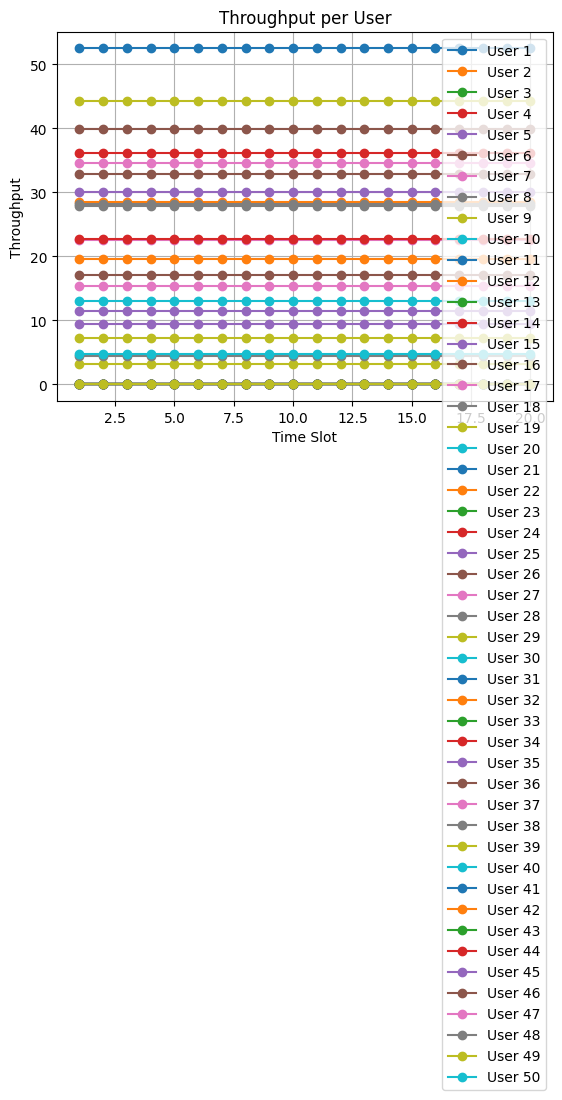

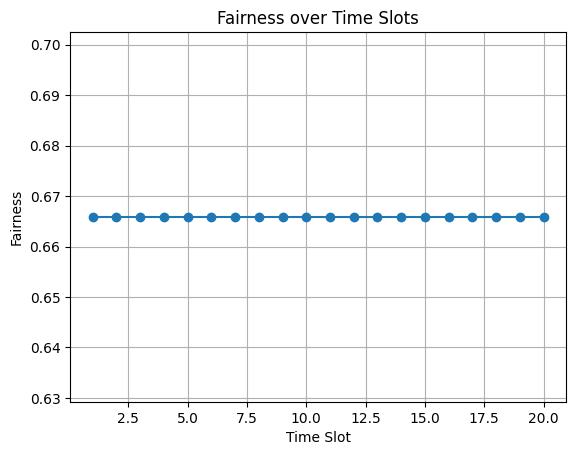

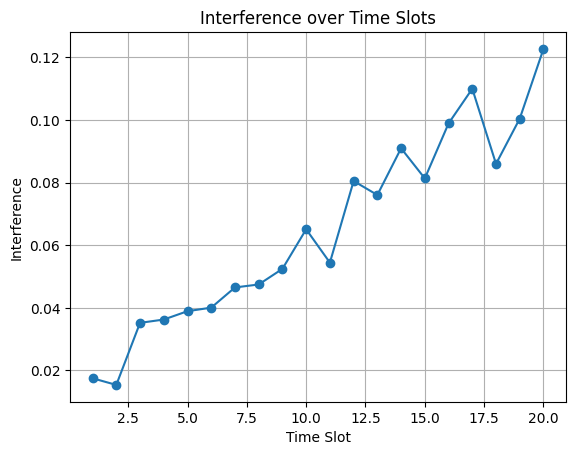

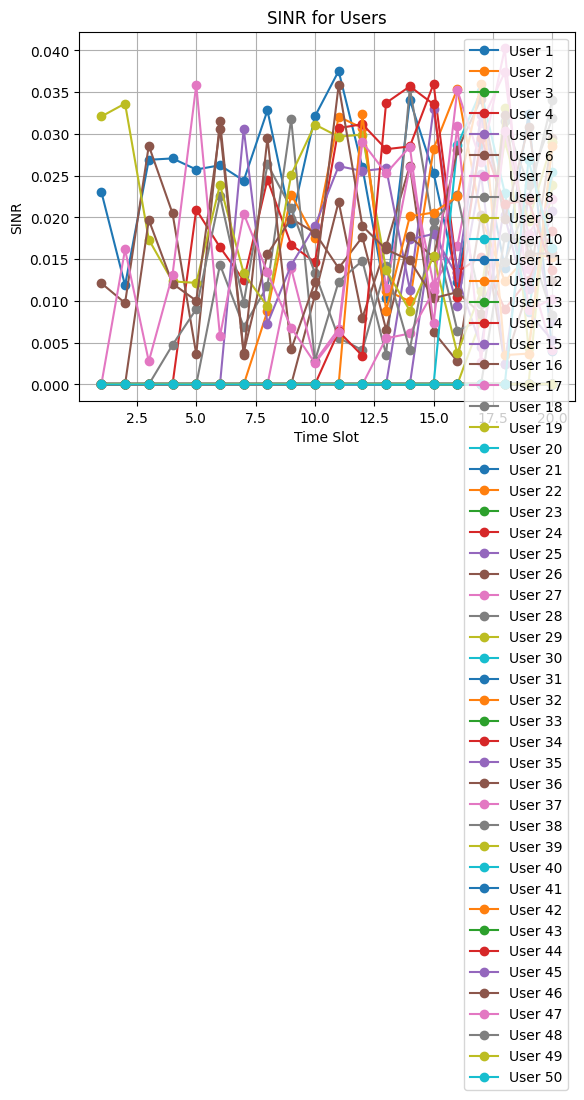

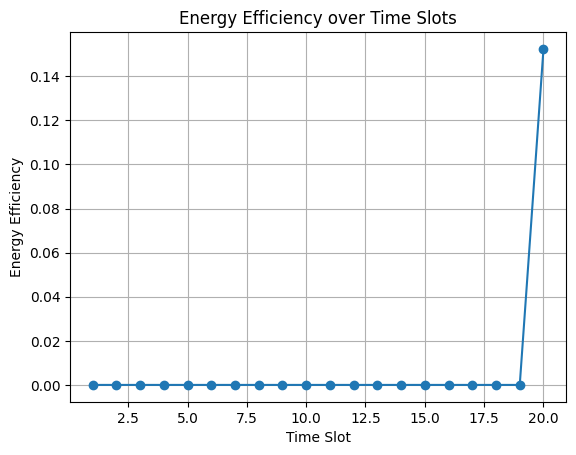

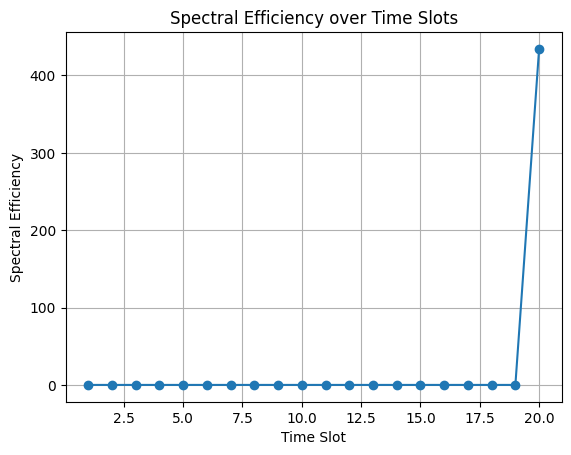

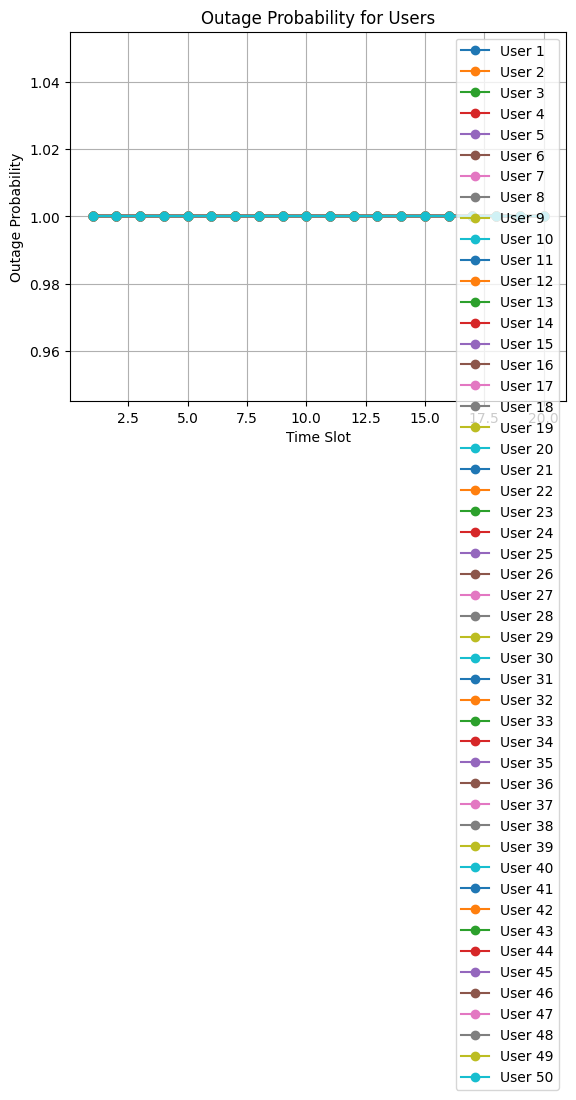

Performance Metrics:
----------------------------
Throughput:
User 1 : 52.48226310809391
User 2 : 28.530705182351852
User 3 : 0.0
User 4 : 0.0
User 5 : 0.0
User 6 : 17.14842041483398
User 7 : 22.642569689081487
User 8 : 0.0
User 9 : 3.1876252947757653
User 10 : 0.0
User 11 : 0.0
User 12 : 0.0
User 13 : 0.0
User 14 : 0.0
User 15 : 9.505561403564624
User 16 : 0.0
User 17 : 0.0
User 18 : 27.801861816254316
User 19 : 0.0
User 20 : 0.0
User 21 : 0.0
User 22 : 0.0
User 23 : 0.0
User 24 : 36.19283493593273
User 25 : 30.04583333716673
User 26 : 0.0
User 27 : 0.0
User 28 : 4.51623949599551
User 29 : 7.217560294160664
User 30 : 12.97919452264939
User 31 : 0.0
User 32 : 0.0
User 33 : 0.0
User 34 : 0.0
User 35 : 11.487271474318009
User 36 : 39.85606473334
User 37 : 15.376223189703495
User 38 : 28.263394492599215
User 39 : 44.24675314939883
User 40 : 0.0
User 41 : 0.0
User 42 : 19.653648349828583
User 43 : 0.0
User 44 : 22.76573425929494
User 45 : 0.0
User 46 : 32.943118190640426
User 47 : 34.59549

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
num_users = 50
num_time_slots = 20
num_subcarriers = 100

# User priorities (higher value represents higher priority)
user_priorities = np.random.randint(1, 6, size=num_users)

# Create a resource allocation grid (time_slots x subcarriers)
resource_grid = np.zeros((num_time_slots, num_subcarriers))

# Create a matrix representing the interference on each subcarrier and time slot
interference_matrix = np.random.uniform(0.1, 1, (num_time_slots, num_subcarriers))

# Generate channel gains for each user, subcarrier, and time slot
channel_gains = np.random.uniform(0.1, 2, (num_users, num_time_slots, num_subcarriers))

# Performance metrics
throughput = np.zeros(num_users)
fairness = np.zeros(num_time_slots)
interference = np.zeros(num_time_slots)
sinr = np.zeros((num_users, num_time_slots))
energy_efficiency = np.zeros(num_time_slots)
spectral_efficiency = np.zeros(num_time_slots)
outage_probability = np.zeros(num_users)

# Function to allocate resources based on user priorities
def allocate_resources(user_priorities, resource_grid):
    num_users = len(user_priorities)
    num_time_slots, num_subcarriers = resource_grid.shape

    for time_slot in range(num_time_slots):
        # Sort users based on their priorities in descending order
        sorted_users = np.argsort(user_priorities)[::-1]

        # Track the number of subcarriers allocated to each user
        user_subcarrier_count = np.zeros(num_users)

        for user in sorted_users:
            # Calculate the number of subcarriers to allocate based on user priority
            subcarriers_to_allocate = int(user_priorities[user] / np.sum(user_priorities) * num_subcarriers)

            for _ in range(subcarriers_to_allocate):
                # Find the least occupied subcarrier
                least_occupied_subcarrier = np.argmin(np.sum(resource_grid == user + 1, axis=0))

                # Assign the user to the least occupied subcarrier in the current time slot
                resource_grid[time_slot, least_occupied_subcarrier] = user + 1

                # Update user subcarrier count
                user_subcarrier_count[user] += 1

        # Calculate throughput for each user in the current time slot
        for user in range(num_users):
            throughput[user] += np.sum(channel_gains[user, time_slot, :] * (resource_grid[time_slot, :] == user + 1))

        # Calculate fairness for the current time slot
        fairness[time_slot] = (np.sum(user_subcarrier_count) ** 2) / (num_users * np.sum(user_subcarrier_count ** 2))

        # Calculate interference for the current time slot
        interference[time_slot] = np.mean(interference_matrix[time_slot, :] * (resource_grid[time_slot, :] != 0))

        # Calculate SINR for each user in the current time slot
        for user in range(num_users):
            interference_power = np.sum(interference_matrix[time_slot, :] * (resource_grid[time_slot, :] != user + 1))
            noise_power = 1.0  # Assuming unit noise power for simplicity
            signal_power = np.sum(channel_gains[user, time_slot, :] * (resource_grid[time_slot, :] == user + 1))
            sinr[user, time_slot]= signal_power / (interference_power + noise_power)

    # Calculate energy efficiency for the current time slot
    allocated_subcarriers = np.sum(resource_grid[time_slot, :] != 0)
    energy_efficiency[time_slot] = np.sum(throughput) / (allocated_subcarriers * np.sum(user_priorities))

    # Calculate spectral efficiency for the current time slot
    total_bandwidth = num_subcarriers  # Assuming all subcarriers are allocated
    spectral_efficiency[time_slot] = np.sum(throughput) / (total_bandwidth * np.log2(1 + np.mean(sinr[:, time_slot])))

    # Calculate outage probability for each user
    sinr_threshold = 10.0  # Set the SINR threshold
    for user in range(num_users):
        outage_probability[user] = np.mean(sinr[user, :] < sinr_threshold)

#Allocate resources based on user priorities
allocate_resources(user_priorities, resource_grid)
#Create a new resource grid for each algorithm
resource_grid_priority = np.zeros((num_time_slots, num_subcarriers))
#Allocate resources based on each algorithm
allocate_resources(user_priorities, resource_grid_priority)
# Calculate average values
avg_throughput = np.mean(throughput)
avg_fairness = np.mean(fairness)
avg_interference = np.mean(interference)
avg_sinr = np.mean(sinr)
avg_energy_efficiency = np.mean(energy_efficiency)
avg_spectral_efficiency = np.mean(spectral_efficiency)
avg_outage_probability = np.mean(outage_probability)

# Print average performance metric parameters
print("Average Performance Metrics:")
print("----------------------------")
print("Average Throughput:", avg_throughput)
print("Average Fairness:", avg_fairness)
print("Average Interference:", avg_interference)
print("Average SINR:", avg_sinr)
print("Average Energy Efficiency:", avg_energy_efficiency)
print("Average Spectral Efficiency:", avg_spectral_efficiency)
print("Average Outage Probability:", avg_outage_probability)



# Plot performance metric parameters
time_slots = np.arange(1, num_time_slots + 1)

# Throughput
plt.figure()
for user in range(num_users):
    user_throughput = np.repeat(throughput[user], num_time_slots)
    plt.plot(time_slots, user_throughput, marker='o', label="User {}".format(user+1))
plt.xlabel("Time Slot")
plt.ylabel("Throughput")
plt.title("Throughput per User")
plt.legend()
plt.grid(True)
plt.show()

# Fairness
plt.figure()
plt.plot(time_slots, fairness, marker='o')
plt.xlabel("Time Slot")
plt.ylabel("Fairness")
plt.title("Fairness over Time Slots")
plt.grid(True)
plt.show()

# Interference
plt.figure()
plt.plot(time_slots, interference, marker='o')
plt.xlabel("Time Slot")
plt.ylabel("Interference")
plt.title("Interference over Time Slots")
plt.grid(True)
plt.show()

# SINR
plt.figure()
for user in range(num_users):
    plt.plot(time_slots, sinr[user, :], marker='o', label="User {}".format(user+1))
plt.xlabel("Time Slot")
plt.ylabel("SINR")
plt.title("SINR for Users")
plt.legend()
plt.grid(True)
plt.show()

# Energy Efficiency
plt.figure()
plt.plot(time_slots, energy_efficiency, marker='o')
plt.xlabel("Time Slot")
plt.ylabel("Energy Efficiency")
plt.title("Energy Efficiency over Time Slots")
plt.grid(True)
plt.show()

# Spectral Efficiency
plt.figure()
plt.plot(time_slots, spectral_efficiency, marker='o')
plt.xlabel("Time Slot")
plt.ylabel("Spectral Efficiency")
plt.title("Spectral Efficiency over Time Slots")
plt.grid(True)
plt.show()

# Outage Probability
plt.figure()
for user in range(num_users):
    user_outage = np.repeat(outage_probability[user], num_time_slots)
    plt.plot(time_slots, user_outage, marker='o', label="User {}".format(user+1))
plt.xlabel("Time Slot")
plt.ylabel("Outage Probability")
plt.title("Outage Probability for Users")
plt.legend()
plt.grid(True)
plt.show()
# Print performance metric parameters
print("Performance Metrics:")
print("----------------------------")
print("Throughput:")
for user in range(num_users):
    print("User", user+1, ":", throughput[user])
print("\nFairness:")
for time_slot in range(num_time_slots):
    print("Time Slot", time_slot+1, ":", fairness[time_slot])
print("\nInterference:")
for time_slot in range(num_time_slots):
    print("Time Slot", time_slot+1, ":", interference[time_slot])
print("\nSINR:")
for user in range(num_users):
    print("User", user+1, ":", sinr[user])
print("\nEnergy Efficiency:")
for time_slot in range(num_time_slots):
    print("Time Slot", time_slot+1, ":", energy_efficiency[time_slot])
print("\nSpectral Efficiency:")
for time_slot in range(num_time_slots):
    print("Time Slot", time_slot+1, ":", spectral_efficiency[time_slot])
print("\nOutage Probability:")
for user in range(num_users):
    print("User", user+1, ":", outage_probability[user])


Average Performance Metrics:
----------------------------
Average Throughput: 5.335420275862998
Average Fairness: 0.7330120481927711
Average Interference: 0.07065739906930996
Average SINR: 0.004829188012083716
Average Energy Efficiency: 0.0038373275862075644
Average Spectral Efficiency: 11.155815425659515
Average Outage Probability: 1.0


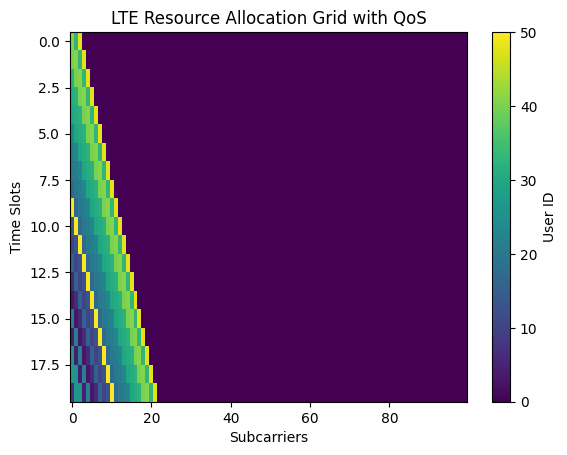

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
num_users = 50
num_time_slots = 20
num_subcarriers = 100

# User priorities (higher value represents higher priority)
user_priorities = np.random.randint(1, 6, size=num_users)

# Create a resource allocation grid (time_slots x subcarriers)
resource_grid = np.zeros((num_time_slots, num_subcarriers))

# Create a matrix representing the interference on each subcarrier and time slot
interference_matrix = np.random.uniform(0.1, 1, (num_time_slots, num_subcarriers))

# Generate channel gains for each user, subcarrier, and time slot
channel_gains = np.random.uniform(0.1, 2, (num_users, num_time_slots, num_subcarriers))

# Performance metrics
throughput = np.zeros(num_users)
fairness = np.zeros(num_time_slots)
interference = np.zeros(num_time_slots)
sinr = np.zeros((num_users, num_time_slots))
energy_efficiency = np.zeros(num_time_slots)
spectral_efficiency = np.zeros(num_time_slots)
outage_probability = np.zeros(num_users)

# Function to allocate resources based on user priorities
def allocate_resources(user_priorities, resource_grid):
    num_users = len(user_priorities)
    num_time_slots, num_subcarriers = resource_grid.shape

    for time_slot in range(num_time_slots):
        # Sort users based on their priorities in descending order
        sorted_users = np.argsort(user_priorities)[::-1]

        # Track the number of subcarriers allocated to each user
        user_subcarrier_count = np.zeros(num_users)

        for user in sorted_users:
            # Calculate the number of subcarriers to allocate based on user priority
            subcarriers_to_allocate = int(user_priorities[user] / np.sum(user_priorities) * num_subcarriers)

            for _ in range(subcarriers_to_allocate):
                # Find the least occupied subcarrier
                least_occupied_subcarrier = np.argmin(np.sum(resource_grid == user + 1, axis=0))

                # Assign the user to the least occupied subcarrier in the current time slot
                resource_grid[time_slot, least_occupied_subcarrier] = user + 1

                # Update user subcarrier count
                user_subcarrier_count[user] += 1

        # Calculate throughput for each user in the current time slot
        for user in range(num_users):
            throughput[user] += np.sum(channel_gains[user, time_slot, :] * (resource_grid[time_slot, :] == user + 1))

        # Calculate fairness for the current time slot
        fairness[time_slot] = (np.sum(user_subcarrier_count) ** 2) / (num_users * np.sum(user_subcarrier_count ** 2))

        # Calculate interference for the current time slot
        interference[time_slot] = np.mean(interference_matrix[time_slot, :] * (resource_grid[time_slot, :] != 0))

        # Calculate SINR for each user in the current time slot
        for user in range(num_users):
            interference_power = np.sum(interference_matrix[time_slot, :] * (resource_grid[time_slot, :] != user + 1))
            noise_power = 1.0  # Assuming unit noise power for simplicity
            signal_power = np.sum(channel_gains[user, time_slot, :] * (resource_grid[time_slot, :] == user + 1))
            sinr[user, time_slot]= signal_power / (interference_power + noise_power)

    # Calculate energy efficiency for the current time slot
    allocated_subcarriers = np.sum(resource_grid[time_slot, :] != 0)
    energy_efficiency[time_slot] = np.sum(throughput) / (allocated_subcarriers * np.sum(user_priorities))

    # Calculate spectral efficiency for the current time slot
    total_bandwidth = num_subcarriers  # Assuming all subcarriers are allocated
    spectral_efficiency[time_slot] = np.sum(throughput) / (total_bandwidth * np.log2(1 + np.mean(sinr[:, time_slot])))

    # Calculate outage probability for each user
    sinr_threshold = 10.0  # Set the SINR threshold
    for user in range(num_users):
        outage_probability[user] = np.mean(sinr[user, :] < sinr_threshold)
#Create a new resource grid for each algorithm
resource_grid_priority = np.zeros((num_time_slots, num_subcarriers))
#Allocate resources based on each algorithm
allocate_resources(user_priorities, resource_grid_priority)
# Calculate average values
avg_throughput = np.mean(throughput)
avg_fairness = np.mean(fairness)
avg_interference = np.mean(interference)
avg_sinr = np.mean(sinr)
avg_energy_efficiency = np.mean(energy_efficiency)
avg_spectral_efficiency = np.mean(spectral_efficiency)
avg_outage_probability = np.mean(outage_probability)

# Print average performance metric parameters
print("Average Performance Metrics:")
print("----------------------------")
print("Average Throughput:", avg_throughput)
print("Average Fairness:", avg_fairness)
print("Average Interference:", avg_interference)
print("Average SINR:", avg_sinr)
print("Average Energy Efficiency:", avg_energy_efficiency)
print("Average Spectral Efficiency:", avg_spectral_efficiency)
print("Average Outage Probability:", avg_outage_probability)

# Visualize the resource allocation grid
plt.imshow(resource_grid_priority, aspect='auto', cmap='viridis', interpolation='nearest')
plt.xlabel('Subcarriers')
plt.ylabel('Time Slots')
plt.title('LTE Resource Allocation Grid with QoS')
plt.colorbar(label='User ID')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tkinter import Tk, Label, Entry, Button

def allocate_resources(user_priorities, resource_grid):
    num_users = len(user_priorities)
    num_time_slots, num_subcarriers = resource_grid.shape

    for time_slot in range(num_time_slots):
        sorted_users = np.argsort(user_priorities)[::-1]

        for user in sorted_users:
            subcarriers_to_allocate = int(user_priorities[user] / np.sum(user_priorities) * num_subcarriers)

            for _ in range(subcarriers_to_allocate):
                least_occupied_subcarrier = np.argmin(np.sum(resource_grid == user + 1, axis=0))
                resource_grid[time_slot, least_occupied_subcarrier] = user + 1

def visualize_resource_allocation(resource_grid):
    plt.imshow(resource_grid, aspect='auto', cmap='viridis', interpolation='nearest')
    plt.xlabel('Subcarriers')
    plt.ylabel('Time Slots')
    plt.title('LTE Resource Allocation Grid with QoS')
    plt.colorbar(label='User ID')
    plt.show()

def visualize_button_click():
    num_users = int(num_users_entry.get())
    num_time_slots = int(num_time_slots_entry.get())
    num_subcarriers = int(num_subcarriers_entry.get())

    user_priorities = np.random.randint(1, 6, size=num_users)
    resource_grid = np.zeros((num_time_slots, num_subcarriers))
    allocate_resources(user_priorities, resource_grid)
    visualize_resource_allocation(resource_grid)

# Create the GUI
root = Tk()
root.title('Resource Allocation')
root.geometry('300x200')

num_users_label = Label(root, text='Number of Users:')
num_users_label.pack()
num_users_entry = Entry(root)
num_users_entry.pack()

num_time_slots_label = Label(root, text='Number of Time Slots:')
num_time_slots_label.pack()
num_time_slots_entry = Entry(root)
num_time_slots_entry.pack()

num_subcarriers_label = Label(root, text='Number of Subcarriers:')
num_subcarriers_label.pack()
num_subcarriers_entry = Entry(root)
num_subcarriers_entry.pack()

visualize_button = Button(root, text='Visualize', command=visualize_button_click)
visualize_button.pack()

TclError: ignored

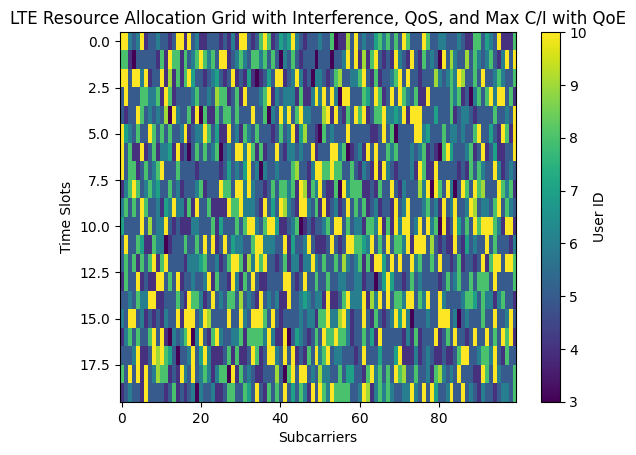

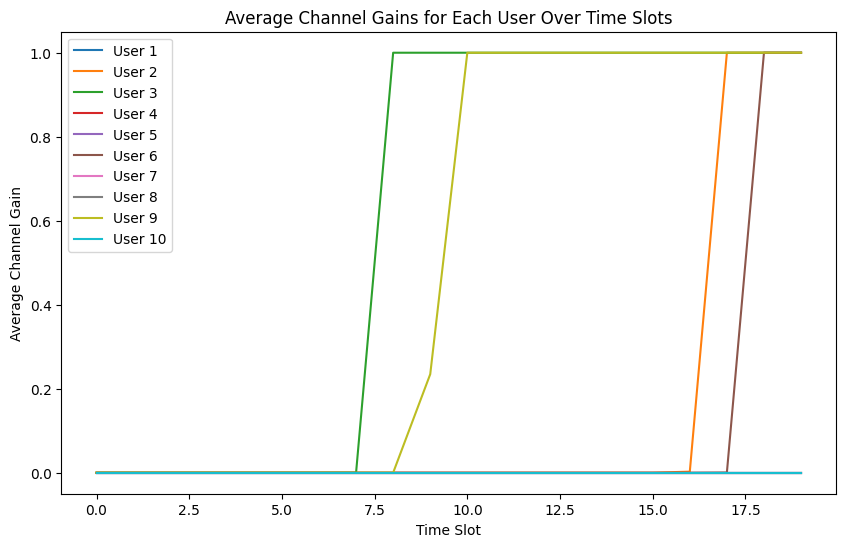

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
num_users = 10
num_time_slots = 20
num_subcarriers = 100

# User priorities (higher value represents higher priority)
user_priorities = np.random.randint(1, 6, size=num_users)

# Create a resource allocation grid (time_slots x subcarriers)
resource_grid = np.zeros((num_time_slots, num_subcarriers))

# Create a matrix representing the interference on each subcarrier and time slot
interference_matrix = np.random.uniform(0.1, 1, (num_time_slots, num_subcarriers))

# Generate channel gains for each user, subcarrier, and time slot
channel_gains = np.random.uniform(0.1, 2, (num_users, num_time_slots, num_subcarriers))

# Function to allocate resources based on Max C/I and user priorities
def allocate_resources_max_ci(user_priorities, resource_grid, interference_matrix, channel_gains):
    num_users = len(user_priorities)
    num_time_slots, num_subcarriers = resource_grid.shape

    for time_slot in range(num_time_slots):
        for subcarrier in range(num_subcarriers):
            max_ci = -np.inf
            best_user = -1

            for user in range(num_users):
                # Calculate the Carrier-to-Interference ratio
                ci_ratio = (channel_gains[user, time_slot, subcarrier] * user_priorities[user]) / (interference_matrix[time_slot, subcarrier] + 1e-9)

                # Update the best user with the highest Carrier-to-Interference ratio
                if ci_ratio > max_ci:
                    max_ci = ci_ratio
                    best_user = user

            # Assign the best user to the subcarrier in the current time slot
            resource_grid[time_slot, subcarrier] = best_user + 1

    # QoE algorithm
    for user in range(num_users):
        user_resource_allocations = np.where(resource_grid == user + 1)
        if len(user_resource_allocations[0]) > 0:
            qoe = np.sum(channel_gains[user][user_resource_allocations]) / len(user_resource_allocations[0])
            if qoe < 0.5:
                for i in range(len(user_resource_allocations[0])):
                    resource_grid[user_resource_allocations[0][i], user_resource_allocations[1][i]] = 0

# Allocate resources based on Max C/I and user priorities
allocate_resources_max_ci(user_priorities, resource_grid, interference_matrix, channel_gains)

# Visualize the resource allocation grid
plt.imshow(resource_grid, aspect='auto', cmap='viridis', interpolation='nearest')
plt.xlabel('Subcarriers')
plt.ylabel('Time Slots')
plt.title('LTE Resource Allocation Grid with Interference, QoS, and Max C/I with QoE')
plt.colorbar(label='User ID')
plt.show()


mcs_levels = {1: {"snr_threshold": 5, "spectral_efficiency": 1},
              2: {"snr_threshold": 10, "spectral_efficiency": 2},
              3: {"snr_threshold": 15, "spectral_efficiency": 4}}
for time_slot in range(num_time_slots):
    for subcarrier in range(num_subcarriers):
        max_ci = -np.inf
        best_user = -1

        for user in range(num_users):
            # Calculate the Carrier-to-Interference ratio
            ci_ratio = (channel_gains[user, time_slot, subcarrier] * user_priorities[user]) / (interference_matrix[time_slot, subcarrier] + 1e-9)

            # Update the best user with the highest Carrier-to-Interference ratio
            if ci_ratio > max_ci:
                max_ci = ci_ratio
                best_user = user

        # Assign the best user to the subcarrier in the current time slot
        resource_grid[time_slot, subcarrier] = best_user + 1

        # Calculate the SNR for the current user
        snr = channel_gains[best_user, time_slot, subcarrier] / (interference_matrix[time_slot, subcarrier] + 1e-9)

        # Find the best MCS level for the user's SNR
        best_mcs = 1
        for mcs_level, mcs_data in mcs_levels.items():
            if snr >= mcs_data["snr_threshold"]:
                best_mcs = mcs_level

        # Calculate the throughput for the current user
        throughput = best_mcs * mcs_levels[best_mcs]["spectral_efficiency"]

user_throughput = np.zeros(num_users)
# ... (inside the loop)
user_throughput[best_user] += throughput # Assuming throughput is calculated using AMC
user_throughput /= (num_time_slots * num_subcarriers)
fairness = (np.sum(user_throughput)**2) / (num_users * np.sum(user_throughput**2))

def update_distance(distance, speed, direction, time_slot_duration):
    new_distance = distance + speed * time_slot_duration * direction
    return max(1, new_distance)  # Ensure that the distance doesn't become too small

# Define user mobility parameters
initial_distances = np.random.uniform(50, 500, num_users)
user_speeds = np.random.uniform(0, 30, num_users)  # Speed in meters/second
user_directions = np.random.choice([-1, 1], num_users)  # -1: moving away, 1: moving towards

# Calculate path loss based on distance
def path_loss(distance):
    path_loss_exponent = 3.5
    reference_distance = 1
    reference_path_loss = 1
    return reference_path_loss * (distance / reference_distance) ** (-path_loss_exponent)

# Update channel gains based on user mobility
time_slot_duration = 1  # Time duration of a single time slot, in seconds
for time_slot in range(num_time_slots):
    for user in range(num_users):
        distance = update_distance(initial_distances[user], user_speeds[user], user_directions[user], time_slot_duration * time_slot)
        channel_gains[user, time_slot] = path_loss(distance)
# Prepare a container to store average channel gains for each user across time slots
average_channel_gains = np.zeros((num_users, num_time_slots))

# Calculate the average channel gains for each user and time slot
for user in range(num_users):
    for time_slot in range(num_time_slots):
        average_channel_gains[user, time_slot] = np.mean(channel_gains[user, time_slot])

# Plot the average channel gains for each user
plt.figure(figsize=(10, 6))
for user in range(num_users):
    plt.plot(range(num_time_slots), average_channel_gains[user], label=f'User {user + 1}')
plt.xlabel('Time Slot')
plt.ylabel('Average Channel Gain')
plt.title('Average Channel Gains for Each User Over Time Slots')
plt.legend()
plt.show()



<ipython-input-5-2a9caf861376>:154: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = animation.FuncAnimation(fig, update_resource_plot, fargs=(resource_plot,), interval=1000)


Historical data saved to historical_data.csv.
1. Add task
2. Remove task
3. Exit


/usr/local/lib/python3.10/dist-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


Enter your choice: 1
Enter task ID: 1
Enter task priority: 3
Enter task feature: 2


2023-06-13 08:40:34,668 Allocating resources to Task ID: 4, Priority: 4, PF Score: 4.0, Allocated Resources: 0/50.82942232521423
2023-06-13 08:40:34,668 Allocating resources to Task ID: 4, Priority: 4, PF Score: 4.0, Allocated Resources: 0/50.82942232521423
2023-06-13 08:40:34,668 Allocating resources to Task ID: 4, Priority: 4, PF Score: 4.0, Allocated Resources: 0/50.82942232521423
2023-06-13 08:40:34,668 Allocating resources to Task ID: 4, Priority: 4, PF Score: 4.0, Allocated Resources: 0/50.82942232521423
2023-06-13 08:40:34,668 Allocating resources to Task ID: 4, Priority: 4, PF Score: 4.0, Allocated Resources: 0/50.82942232521423
INFO:__main__:Allocating resources to Task ID: 4, Priority: 4, PF Score: 4.0, Allocated Resources: 0/50.82942232521423
2023-06-13 08:40:34,680 Allocating resources to Task ID: 2, Priority: 3, PF Score: 3.0, Allocated Resources: 0/51.11130775792918
2023-06-13 08:40:34,680 Allocating resources to Task ID: 2, Priority: 3, PF Score: 3.0, Allocated Resources

Task added successfully.
Monitoring resource demands...


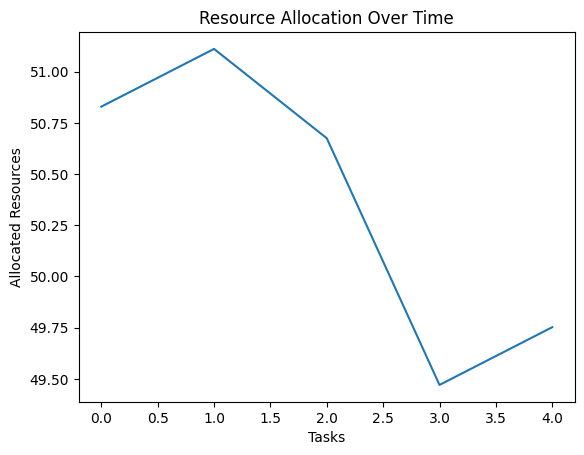


Allocated tasks:
Task ID: 4, Priority: 4, PF Score: 4.0, Allocated Resources: 50.82942232521423/50.82942232521423
Task ID: 2, Priority: 3, PF Score: 3.0, Allocated Resources: 51.11130775792918/51.11130775792918
Task ID: 1, Priority: 3, PF Score: 3.0, Allocated Resources: 50.6750786233591/50.6750786233591
Task ID: 3, Priority: 2, PF Score: 2.0, Allocated Resources: 49.47036504157171/49.47036504157171
Task ID: 1, Priority: 1, PF Score: 1.0, Allocated Resources: 49.75225047428666/49.75225047428666
1. Add task
2. Remove task
3. Exit
Enter your choice: 1
Enter task ID: 2
Enter task priority: 1
Enter task feature: 1


2023-06-13 08:40:43,571 Allocating resources to Task ID: 2, Priority: 1, PF Score: 1.0, Allocated Resources: 0/51.31602133971658
2023-06-13 08:40:43,571 Allocating resources to Task ID: 2, Priority: 1, PF Score: 1.0, Allocated Resources: 0/51.31602133971658
2023-06-13 08:40:43,571 Allocating resources to Task ID: 2, Priority: 1, PF Score: 1.0, Allocated Resources: 0/51.31602133971658
2023-06-13 08:40:43,571 Allocating resources to Task ID: 2, Priority: 1, PF Score: 1.0, Allocated Resources: 0/51.31602133971658
2023-06-13 08:40:43,571 Allocating resources to Task ID: 2, Priority: 1, PF Score: 1.0, Allocated Resources: 0/51.31602133971658
INFO:__main__:Allocating resources to Task ID: 2, Priority: 1, PF Score: 1.0, Allocated Resources: 0/51.31602133971658


Task added successfully.
Monitoring resource demands...


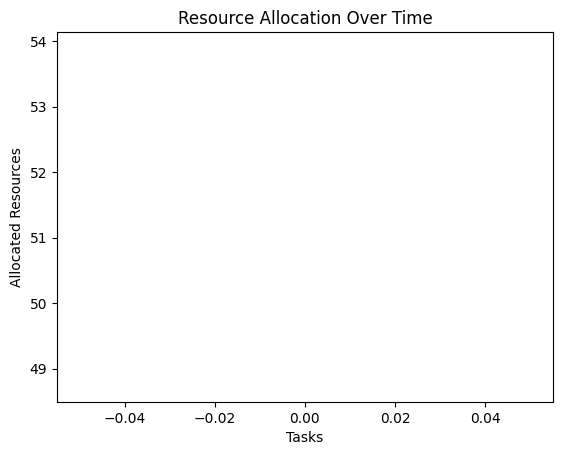


Allocated tasks:
Task ID: 2, Priority: 1, PF Score: 1.0, Allocated Resources: 51.31602133971658/51.31602133971658
1. Add task
2. Remove task
3. Exit
Enter your choice: 1
Enter task ID: 1
Enter task priority: 1
Enter task feature: 1


2023-06-13 08:40:55,344 Allocating resources to Task ID: 1, Priority: 1, PF Score: 1.0, Allocated Resources: 0/51.31602133971658
2023-06-13 08:40:55,344 Allocating resources to Task ID: 1, Priority: 1, PF Score: 1.0, Allocated Resources: 0/51.31602133971658
2023-06-13 08:40:55,344 Allocating resources to Task ID: 1, Priority: 1, PF Score: 1.0, Allocated Resources: 0/51.31602133971658
2023-06-13 08:40:55,344 Allocating resources to Task ID: 1, Priority: 1, PF Score: 1.0, Allocated Resources: 0/51.31602133971658
2023-06-13 08:40:55,344 Allocating resources to Task ID: 1, Priority: 1, PF Score: 1.0, Allocated Resources: 0/51.31602133971658
INFO:__main__:Allocating resources to Task ID: 1, Priority: 1, PF Score: 1.0, Allocated Resources: 0/51.31602133971658


Task added successfully.
Monitoring resource demands...


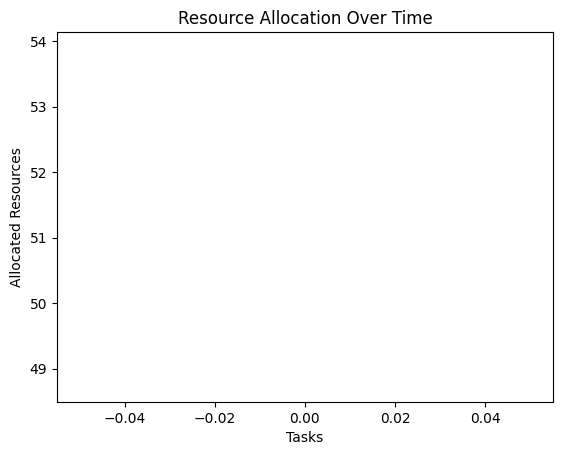


Allocated tasks:
Task ID: 1, Priority: 1, PF Score: 1.0, Allocated Resources: 51.31602133971658/51.31602133971658
1. Add task
2. Remove task
3. Exit
Enter your choice: 3


In [ ]:
import heapq
import time
import numpy as np
import logging
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib.animation as animation
import csv

logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

# Create a file handler
file_handler = logging.FileHandler('resource_allocation.log')
file_handler.setLevel(logging.INFO)

# Create a console handler
console_handler = logging.StreamHandler()
console_handler.setLevel(logging.DEBUG)  # Set to DEBUG for more detailed console output during development

# Create a formatter and add it to the handlers
formatter = logging.Formatter('%(asctime)s %(message)s')
file_handler.setFormatter(formatter)
console_handler.setFormatter(formatter)

# Add the handlers to the logger
logger.addHandler(file_handler)
logger.addHandler(console_handler)


class Task:
    def __init__(self, id, priority, feature, resource_req=None):
        self.id = id
        self.priority = priority
        self.feature = feature
        self.resource_req = resource_req
        self.allocated_resources = 0
        self.pf_score = 0  # Proportional Fair score

    def __lt__(self, other):
        return self.pf_score < other.pf_score

    def __str__(self):
        return f"Task ID: {self.id}, Priority: {self.priority}, PF Score: {self.pf_score}, Allocated Resources: {self.allocated_resources}/{self.resource_req}"


def train_predictive_model(features, resource_reqs):
    features = np.array(features).reshape(-1, 1)
    resource_reqs = np.array(resource_reqs).reshape(-1, 1)

    model = LinearRegression()
    model.fit(features, resource_reqs)
    return model


def predict_resource_req(model, feature):
    feature = np.array([feature]).reshape(-1, 1)
    return model.predict(feature)[0][0]


def monitor_resource_demand(tasks, update_interval=1):
    """Simulate dynamic changes in resource requirements."""
    for task in tasks:
        task.resource_req += update_interval * task.priority


def allocate_resources_pf(task_queue, available_resources):
    allocated_tasks = []
    resource_plot = []

    while available_resources > 0 and task_queue:
        # Calculate PF score for each task
        for task in task_queue:
            task.pf_score = task.priority / (task.allocated_resources + 1)

        # Sort task queue based on PF score
        task_queue.sort(reverse=True)

        current_task = task_queue[0]

        if current_task.resource_req <= available_resources:
            logger.info(f"Allocating resources to {current_task}")
            current_task.allocated_resources = current_task.resource_req
            allocated_tasks.append(current_task)
            available_resources -= current_task.resource_req
            task_queue.remove(current_task)
            resource_plot.append(current_task.allocated_resources)
        else:
            logger.info(f"Insufficient resources for {current_task}")
            # Sort remaining tasks by priority in descending order
            task_queue.sort(key=lambda x: x.priority, reverse=True)
            break

    # Plot resource allocation
    plt.plot(resource_plot)
    plt.title('Resource Allocation Over Time')
    plt.xlabel('Tasks')
    plt.ylabel('Allocated Resources')
    plt.show()

    return allocated_tasks


if __name__ == "__main__":
    task_queue = []

    # Generate random historical data
    num_samples = 100  # Number of historical data points
    min_feature = 1
    max_feature = 10
    min_resource_req = 1
    max_resource_req = 100

    features = np.random.randint(min_feature, max_feature+1, size=num_samples)
    resource_reqs = np.random.randint(min_resource_req, max_resource_req+1, size=num_samples)
    # Save historical data to a CSV file
    file_path = 'historical_data.csv'

    with open(file_path, 'w', newline='') as csvfile:
         writer = csv.writer(csvfile)
         writer.writerow(['Feature', 'Resource Requirement'])
         for i in range(num_samples):
            writer.writerow([features[i], resource_reqs[i]])

         print(f"Historical data saved to {file_path}.")
    predictive_model = train_predictive_model(features, resource_reqs)

    tasks = [
        Task(1, 1, 5),
        Task(2, 3, 6),
        Task(3, 2, 7),
        Task(4, 4, 8),
    ]

    for task in tasks:
        task.resource_req = predict_resource_req(predictive_model, task.feature)
        task_queue.append(task)

    available_resources = 500



    # Add a function to update the resource plot animation
    def update_resource_plot(frame_num, resource_plot):
        plt.cla()
        plt.plot(resource_plot)
        plt.title('Resource Allocation Over Time')
        plt.xlabel('Tasks')
        plt.ylabel('Allocated Resources')

    # Modify the resource allocation loop
    fig = plt.figure()
    resource_plot = []
    ani = animation.FuncAnimation(fig, update_resource_plot, fargs=(resource_plot,), interval=1000)

    while True:
        print("1. Add task")
        print("2. Remove task")
        print("3. Exit")
        choice = input("Enter your choice: ")

        if choice == '1':
            task_id = int(input("Enter task ID: "))
            priority = int(input("Enter task priority: "))
            feature = int(input("Enter task feature: "))
            task = Task(task_id, priority, feature)
            task.resource_req = predict_resource_req(predictive_model, task.feature)
            task_queue.append(task)
            print("Task added successfully.")
        elif choice == '2':
            task_id = int(input("Enter task ID to remove: "))
            task_to_remove = next((task for task in task_queue if task.id == task_id), None)
            if task_to_remove:
                task_queue.remove(task_to_remove)
                print("Task removed successfully.")
            else:
                print("Task not found.")
        elif choice == '3':
            break
        else:
            print("Invalid choice. Please try again.")

        print("Monitoring resource demands...")
        monitor_resource_demand(tasks)

        allocated_tasks = allocate_resources_pf(task_queue, available_resources)
        print("\nAllocated tasks:")
        for task in allocated_tasks:
            print(task)
            available_resources -= task.allocated_resources
            resource_plot.append(task.allocated_resources)

        time.sleep(1)

    plt.show()


<ipython-input-4-5350e328e6a8>:168: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = animation.FuncAnimation(fig, update_resource_plot, fargs=(resource_plot,), interval=1000)


Historical data saved to historical_data.csv.
1. Add task
2. Remove task
3. Exit


/usr/local/lib/python3.10/dist-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


Enter your choice: 1
Enter task ID: 1
Enter task priority: 2
Enter task feature: 1


2023-06-13 08:36:40,743 Allocating resources to Task ID: 4, Priority: 4, PF Score: 4.0, Allocated Resources: 0/53.055296126882524
2023-06-13 08:36:40,743 Allocating resources to Task ID: 4, Priority: 4, PF Score: 4.0, Allocated Resources: 0/53.055296126882524
2023-06-13 08:36:40,743 Allocating resources to Task ID: 4, Priority: 4, PF Score: 4.0, Allocated Resources: 0/53.055296126882524
2023-06-13 08:36:40,743 Allocating resources to Task ID: 4, Priority: 4, PF Score: 4.0, Allocated Resources: 0/53.055296126882524
INFO:__main__:Allocating resources to Task ID: 4, Priority: 4, PF Score: 4.0, Allocated Resources: 0/53.055296126882524
2023-06-13 08:36:40,754 Allocating resources to Task ID: 2, Priority: 3, PF Score: 3.0, Allocated Resources: 0/50.396818382677864
2023-06-13 08:36:40,754 Allocating resources to Task ID: 2, Priority: 3, PF Score: 3.0, Allocated Resources: 0/50.396818382677864
2023-06-13 08:36:40,754 Allocating resources to Task ID: 2, Priority: 3, PF Score: 3.0, Allocated Re

Task added successfully.
Monitoring resource demands...


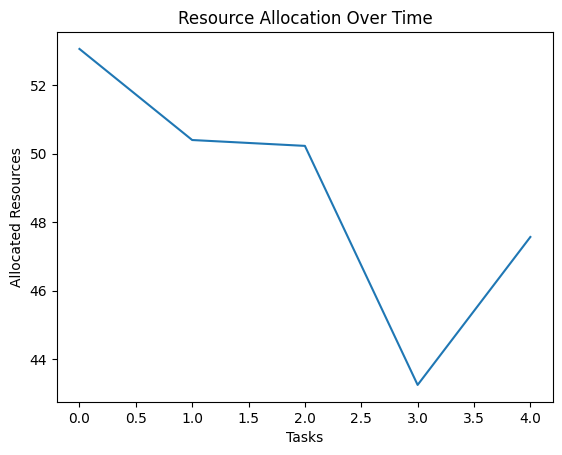


Allocated tasks:
Task ID: 4, Priority: 4, PF Score: 4.0, Allocated Resources: 53.055296126882524/53.055296126882524
Task ID: 2, Priority: 3, PF Score: 3.0, Allocated Resources: 50.396818382677864/50.396818382677864
Task ID: 3, Priority: 2, PF Score: 2.0, Allocated Resources: 50.226057254780194/50.226057254780194
Task ID: 1, Priority: 2, PF Score: 2.0, Allocated Resources: 43.25062402216623/43.25062402216623
Task ID: 1, Priority: 1, PF Score: 1.0, Allocated Resources: 47.56757951057554/47.56757951057554
1. Add task
2. Remove task
3. Exit
Enter your choice: 1
Enter task ID: 2
Enter task priority: 1
Enter task feature: 3


2023-06-13 08:36:55,136 Allocating resources to Task ID: 2, Priority: 1, PF Score: 1.0, Allocated Resources: 0/44.90910176637088
2023-06-13 08:36:55,136 Allocating resources to Task ID: 2, Priority: 1, PF Score: 1.0, Allocated Resources: 0/44.90910176637088
2023-06-13 08:36:55,136 Allocating resources to Task ID: 2, Priority: 1, PF Score: 1.0, Allocated Resources: 0/44.90910176637088
2023-06-13 08:36:55,136 Allocating resources to Task ID: 2, Priority: 1, PF Score: 1.0, Allocated Resources: 0/44.90910176637088
INFO:__main__:Allocating resources to Task ID: 2, Priority: 1, PF Score: 1.0, Allocated Resources: 0/44.90910176637088


Task added successfully.
Monitoring resource demands...


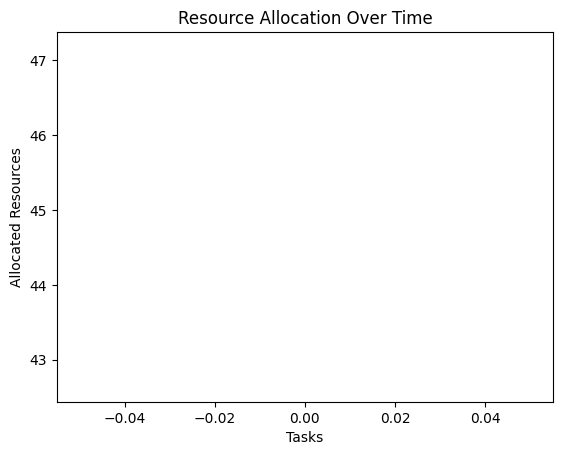


Allocated tasks:
Task ID: 2, Priority: 1, PF Score: 1.0, Allocated Resources: 44.90910176637088/44.90910176637088
1. Add task
2. Remove task
3. Exit
Enter your choice: 1
Enter task ID: 3
Enter task priority: 2
Enter task feature: 1


2023-06-13 08:37:08,720 Allocating resources to Task ID: 3, Priority: 2, PF Score: 2.0, Allocated Resources: 0/43.25062402216623
2023-06-13 08:37:08,720 Allocating resources to Task ID: 3, Priority: 2, PF Score: 2.0, Allocated Resources: 0/43.25062402216623
2023-06-13 08:37:08,720 Allocating resources to Task ID: 3, Priority: 2, PF Score: 2.0, Allocated Resources: 0/43.25062402216623
2023-06-13 08:37:08,720 Allocating resources to Task ID: 3, Priority: 2, PF Score: 2.0, Allocated Resources: 0/43.25062402216623
INFO:__main__:Allocating resources to Task ID: 3, Priority: 2, PF Score: 2.0, Allocated Resources: 0/43.25062402216623


Task added successfully.
Monitoring resource demands...


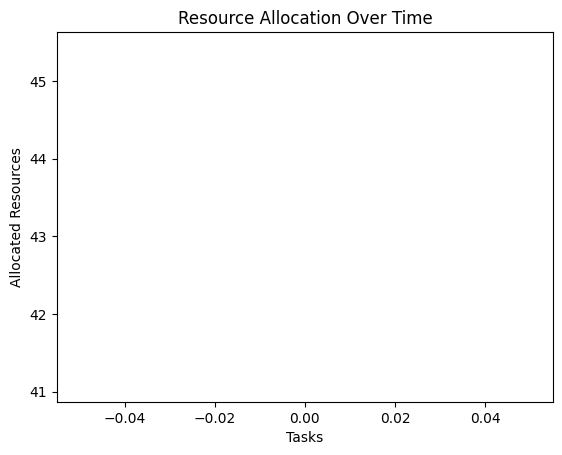


Allocated tasks:
Task ID: 3, Priority: 2, PF Score: 2.0, Allocated Resources: 43.25062402216623/43.25062402216623
1. Add task
2. Remove task
3. Exit
Enter your choice: 3

Average Throughput: 0.998923474119574 tasks per second
Average Latency: 1.001077686037336 seconds per task


In [ ]:
import heapq
import time
import numpy as np
import logging
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib.animation as animation
import csv

logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

# Create a file handler
file_handler = logging.FileHandler('resource_allocation.log')
file_handler.setLevel(logging.INFO)

# Create a console handler
console_handler = logging.StreamHandler()
console_handler.setLevel(logging.DEBUG)  # Set to DEBUG for more detailed console output during development

# Create a formatter and add it to the handlers
formatter = logging.Formatter('%(asctime)s %(message)s')
file_handler.setFormatter(formatter)
console_handler.setFormatter(formatter)

# Add the handlers to the logger
logger.addHandler(file_handler)
logger.addHandler(console_handler)


class Task:
    def __init__(self, id, priority, feature, resource_req=None):
        self.id = id
        self.priority = priority
        self.feature = feature
        self.resource_req = resource_req
        self.allocated_resources = 0
        self.pf_score = 0  # Proportional Fair score
        self.start_time = None
        self.end_time = None

    def __lt__(self, other):
        return self.pf_score < other.pf_score

    def __str__(self):
        return f"Task ID: {self.id}, Priority: {self.priority}, PF Score: {self.pf_score}, Allocated Resources: {self.allocated_resources}/{self.resource_req}"

    def start(self):
        self.start_time = time.time()

    def complete(self):
        self.end_time = time.time()

    def get_completion_time(self):
        if self.start_time is not None and self.end_time is not None:
            return self.end_time - self.start_time
        else:
            return None


def train_predictive_model(features, resource_reqs):
    features = np.array(features).reshape(-1, 1)
    resource_reqs = np.array(resource_reqs).reshape(-1, 1)

    model = LinearRegression()
    model.fit(features, resource_reqs)
    return model


def predict_resource_req(model, feature):
    feature = np.array([feature]).reshape(-1, 1)
    return model.predict(feature)[0][0]


def monitor_resource_demand(tasks, update_interval=1):
    """Simulate dynamic changes in resource requirements."""
    for task in tasks:
        task.resource_req += update_interval * task.priority


def allocate_resources_pf(task_queue, available_resources):
    allocated_tasks = []
    resource_plot = []

    while available_resources > 0 and task_queue:
        # Calculate PF score for each task
        for task in task_queue:
            task.pf_score = task.priority / (task.allocated_resources + 1)

        # Sort task queue based on PF score
        task_queue.sort(reverse=True)

        current_task = task_queue[0]

        if current_task.resource_req <= available_resources:
            logger.info(f"Allocating resources to {current_task}")
            current_task.allocated_resources = current_task.resource_req
            current_task.start()
            allocated_tasks.append(current_task)
            available_resources -= current_task.resource_req
            task_queue.remove(current_task)
            resource_plot.append(current_task.allocated_resources)
        else:
            logger.info(f"Insufficient resources for {current_task}")
            # Sort remaining tasks by priority in descending order
            task_queue.sort(key=lambda x: x.priority, reverse=True)
            break

    # Plot resource allocation
    plt.plot(resource_plot)
    plt.title('Resource Allocation Over Time')
    plt.xlabel('Tasks')
    plt.ylabel('Allocated Resources')
    plt.show()

    return allocated_tasks


if __name__ == "__main__":
    task_queue = []

    # Generate random historical data
    num_samples = 100  # Number of historical data points
    min_feature = 1
    max_feature = 10
    min_resource_req = 1
    max_resource_req = 100

    features = np.random.randint(min_feature, max_feature+1, size=num_samples)
    resource_reqs = np.random.randint(min_resource_req, max_resource_req+1, size=num_samples)
    # Save historical data to a CSV file
    file_path = 'historical_data.csv'

    with open(file_path, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Feature', 'Resource Requirement'])
        for i in range(num_samples):
            writer.writerow([features[i], resource_reqs[i]])

    print(f"Historical data saved to {file_path}.")
    predictive_model = train_predictive_model(features, resource_reqs)

    tasks = [
        Task(1, 1, 5),
        Task(2, 3, 6),
        Task(3, 2, 7),
        Task(4, 4, 8),
    ]

    for task in tasks:
        task.resource_req = predict_resource_req(predictive_model, task.feature)
        task_queue.append(task)

    available_resources = 500

    # Add a function to update the resource plot animation
    def update_resource_plot(frame_num, resource_plot):
        plt.cla()
        plt.plot(resource_plot)
        plt.title('Resource Allocation Over Time')
        plt.xlabel('Tasks')
        plt.ylabel('Allocated Resources')


    # Modify the resource allocation loop
    fig = plt.figure()
    resource_plot = []
    ani = animation.FuncAnimation(fig, update_resource_plot, fargs=(resource_plot,), interval=1000)

    total_completion_time = 0
    num_completed_tasks = 0

    while True:
        print("1. Add task")
        print("2. Remove task")
        print("3. Exit")
        choice = input("Enter your choice: ")

        if choice == '1':
            task_id = int(input("Enter task ID: "))
            priority = int(input("Enter task priority: "))
            feature = int(input("Enter task feature: "))
            task = Task(task_id, priority, feature)
            task.resource_req = predict_resource_req(predictive_model, task.feature)
            task_queue.append(task)
            print("Task added successfully.")
        elif choice == '2':
            task_id = int(input("Enter task ID to remove: "))
            task_to_remove = next((task for task in task_queue if task.id == task_id), None)
            if task_to_remove:
                task_queue.remove(task_to_remove)
                print("Task removed successfully.")
            else:
                print("Task not found.")
        elif choice == '3':
            break
        else:
            print("Invalid choice. Please try again.")

        print("Monitoring resource demands...")
        monitor_resource_demand(tasks)

        allocated_tasks = allocate_resources_pf(task_queue, available_resources)
        print("\nAllocated tasks:")
        for task in allocated_tasks:
            print(task)
            available_resources -= task.allocated_resources
            resource_plot.append(task.allocated_resources)
            task.start()
            time.sleep(1)
            task.complete()
            completion_time = task.get_completion_time()
            if completion_time is not None:
                total_completion_time += completion_time
                num_completed_tasks += 1

    average_throughput = num_completed_tasks / total_completion_time
    average_latency = total_completion_time / num_completed_tasks

    print(f"\nAverage Throughput: {average_throughput} tasks per second")
    print(f"Average Latency: {average_latency} seconds per task")

    plt.show()
